In [1]:
realDataSet <- read.csv(file = 'C:/Users/garre/Desktop/DataPredictionModel2015to2019/2015to2020NoNews/Name.csv')
precentage<- read.csv(file = 'C:/Users/garre/Desktop/DataPredictionModel2015to2019/2015to2020NoNews/NamePrecent.csv')

library(mlbench)
library(corrplot)
library(ggvis)
library(randomForest)

Warning message:
"package 'mlbench' was built under R version 3.6.3"Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [2]:

#####Creates if there was a change in SPY
###1 above zero, 0 for below zerp
##Used for categeorical Prediction
#precentage$change=ifelse(precentage$spyClose>0,1,0)

size<-nrow(precentage)
precentage<-precentage[2:size,]#getting rid of first row, we are using "yesterday's data", for tomorrow's spy change
precentage$change=ifelse(precentage$spyClose>0,1,0)
#Scaling data
newPrecentScaled=as.data.frame(scale(precentage[,c(-1,-50)]))
newPrecentScaled$change= precentage$change
#head(newPrecentScaled)

In [42]:
##################################
#############################
#Correlation Values Section
#############################
##################################
#############Improved Corrplot Version

dim(precentage)



[1] 1200   50

ERROR: Error in library(ggvis): there is no package called 'ggvis'


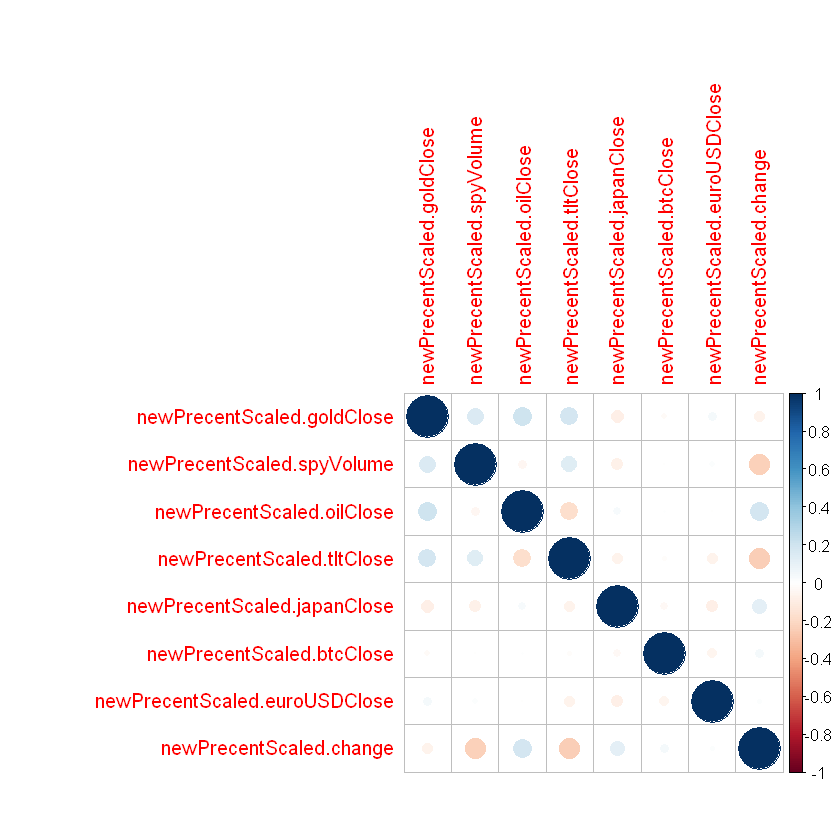

In [14]:
CorrelationTEster2<-data.frame(newPrecentScaled$goldClose,
                               newPrecentScaled$spyVolume,
                               newPrecentScaled$oilClose,
                               newPrecentScaled$tltClose,
                               newPrecentScaled$japanClose,
                               newPrecentScaled$btcClose,
                               newPrecentScaled$euroUSDClose,
                               newPrecentScaled$change)
corlChart<-cor(CorrelationTEster2)
corrplot(corlChart, method = "circle")

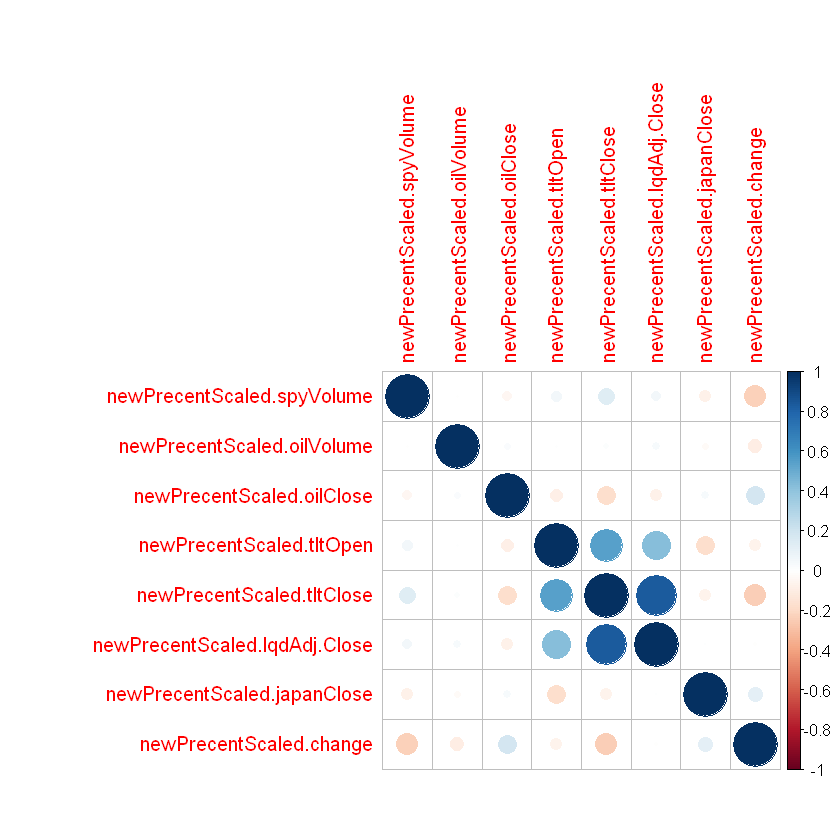

In [16]:
CorrelationTEster2<-data.frame(
                               newPrecentScaled$spyVolume,
                               newPrecentScaled$oilVolume,
                               newPrecentScaled$oilClose,
                               newPrecentScaled$tltOpen,
                               newPrecentScaled$tltClose,
                               newPrecentScaled$lqdAdj.Close,
                               newPrecentScaled$japanClose,
                               newPrecentScaled$change)
corlChart<-cor(CorrelationTEster2)
corrplot(corlChart, method = "circle")

In [26]:
drops <- c("euroUSDVolume", "japanVolume", "goldVolume")
newdf<-newPrecentScaled[ , !(names(newPrecentScaled) %in% drops)]



In [134]:
library(leaps)
drops <- c('spyOpen', 'spyHigh', 'spyLow' ,'spyClose', 'spyAdj.Close')
subsetting<-newdf[ , !(names(newdf) %in% drops)]


In [136]:
regit.full=regsubsets(change~., subsetting, nvmax=19)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"5  linear dependencies found"

Reordering variables and trying again:


In [137]:
summary(regit.full)

Subset selection object
Call: regsubsets.formula(change ~ ., subsetting, nvmax = 19)
40 Variables  (and intercept)
                 Forced in Forced out
spyVolume            FALSE      FALSE
goldOpen             FALSE      FALSE
goldHigh             FALSE      FALSE
goldLow              FALSE      FALSE
goldClose            FALSE      FALSE
oilOpen              FALSE      FALSE
oilHigh              FALSE      FALSE
oilLow               FALSE      FALSE
oilClose             FALSE      FALSE
oilVolume            FALSE      FALSE
japanOpen            FALSE      FALSE
japanHigh            FALSE      FALSE
japanLow             FALSE      FALSE
japanClose           FALSE      FALSE
btcOpen              FALSE      FALSE
btcHigh              FALSE      FALSE
btcLow               FALSE      FALSE
btcClose             FALSE      FALSE
btcVolume            FALSE      FALSE
lqdOpen              FALSE      FALSE
lqdHigh              FALSE      FALSE
lqdLow               FALSE      FALSE
lqdClose   

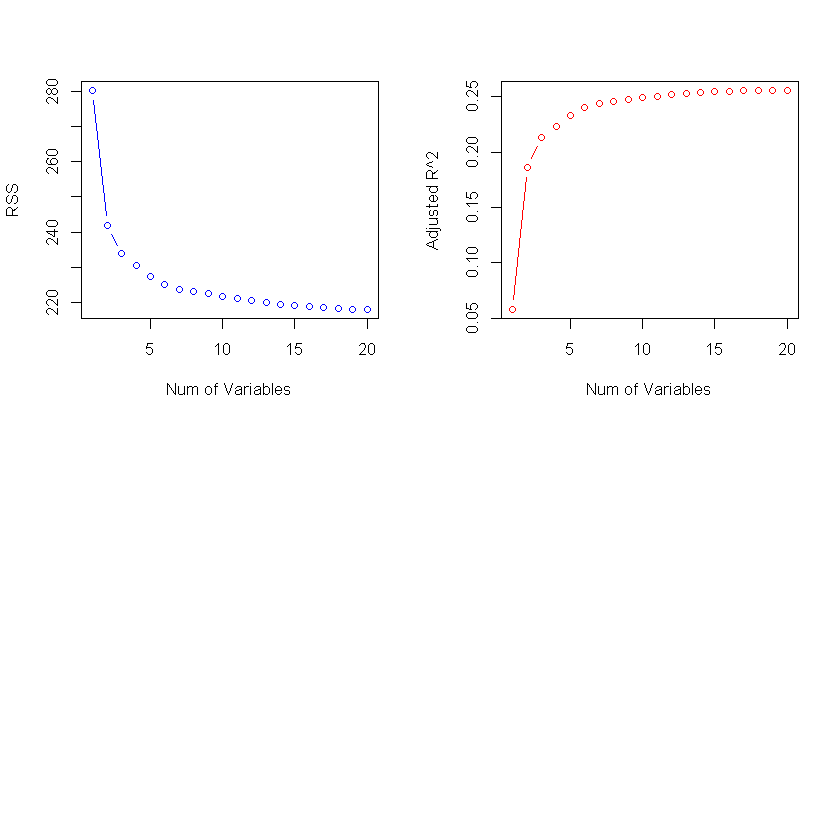

In [140]:
#plot(regit.full)
sumOfRegSub=summary(regit.full)
par(mfrow=c(2,2))
plot(sumOfRegSub$rss,
    xlab= "Num of Variables",
    ylab= "RSS",
    col="blue",
    type="b")


plot(sumOfRegSub$adjr2,
    xlab= "Num of Variables",
    ylab= "Adjusted R^2",
    col="red",
    type="b")



In [ ]:
rsq <- as.data.frame(reg.summary$rsq)
names(rsq) <- "R2"
rsq %>% 
        ggvis(x=~ c(1:nrow(rsq)), y=~R2 ) %>%
        layer_points(fill = ~ R2 ) %>%
        add_axis("y", title = "R2") %>% 
        add_axis("x", title = "Number of variables")

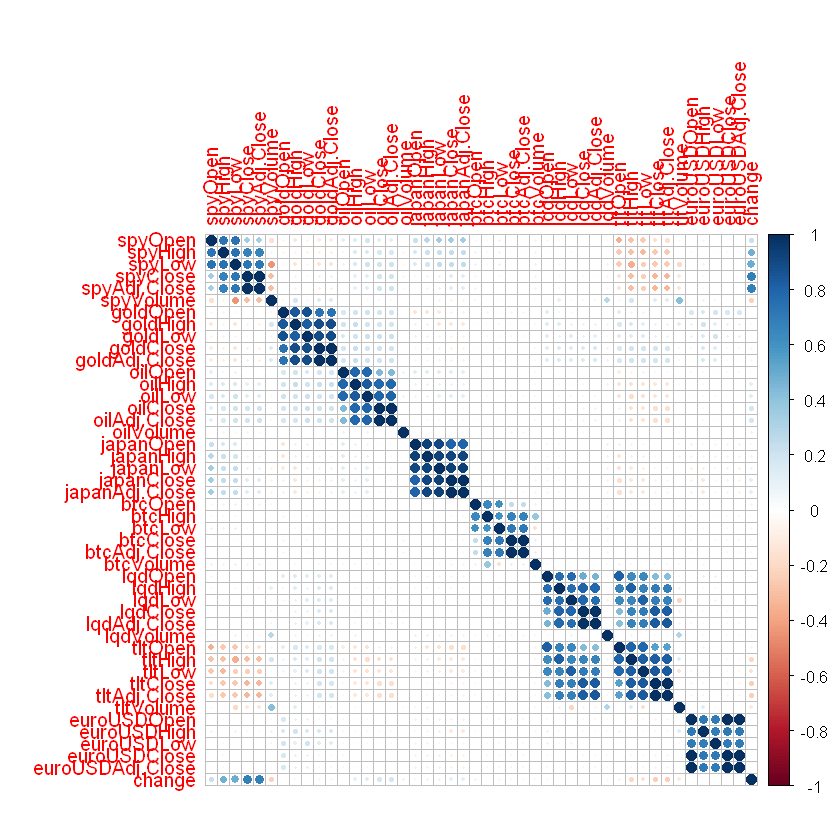

In [27]:
CorrelationTEster2<-data.frame(newdf)
corlChart<-cor(CorrelationTEster2)
corrplot(corlChart, method = "circle")

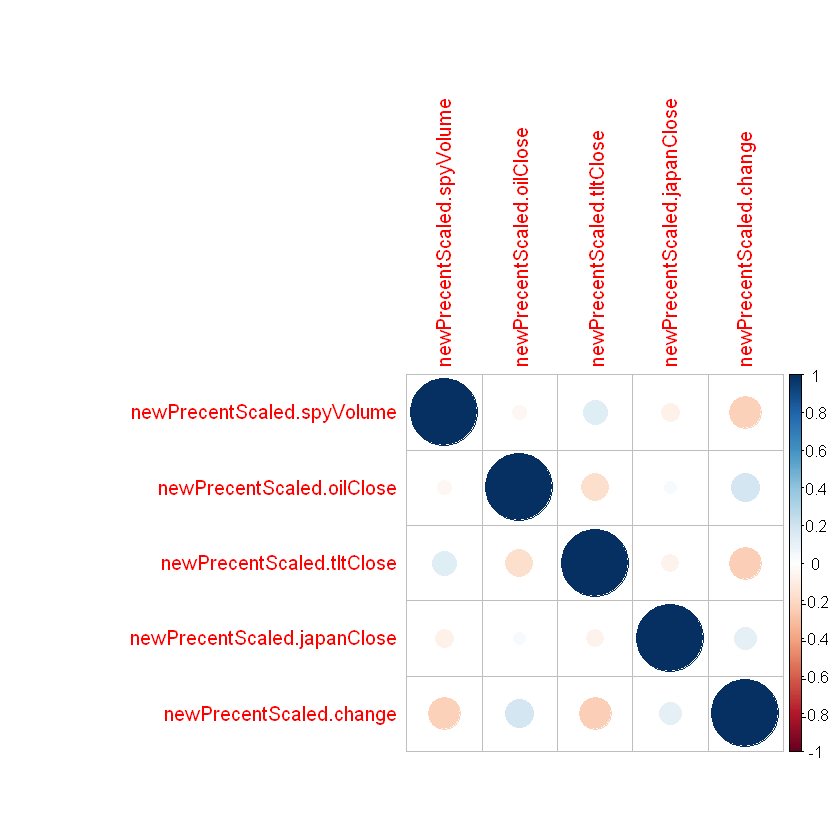

In [3]:
CorrelationTEster2<-data.frame(newPrecentScaled$spyVolume,newPrecentScaled$oilClose,newPrecentScaled$tltClose,newPrecentScaled$japanClose,newPrecentScaled$change)
corlChart<-cor(CorrelationTEster2)
corrplot(corlChart, method = "circle")

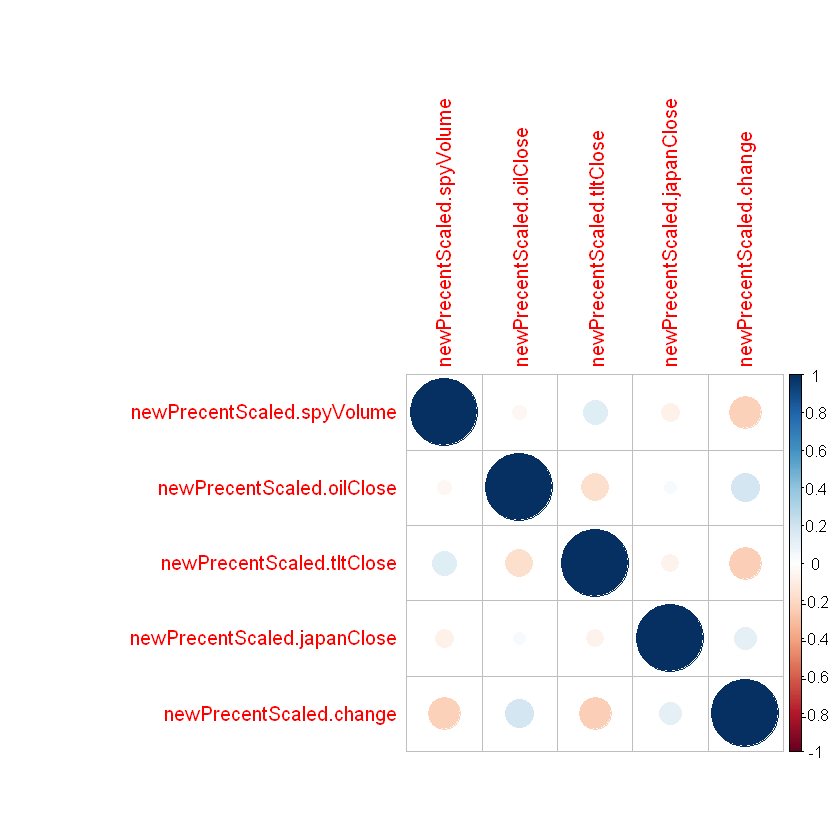

In [6]:
corlChart<-cor(CorrelationTEster2)
corrplot(corlChart, method = "circle")


In [8]:
CorrelationTEster2<-data.frame(newPrecentScaled$spyVolume,newPrecentScaled$oilClose,newPrecentScaled$oilvolume,newPrecentScaled$tltClose,newPrecentScaled$japanClose,newPrecentScaled$change)
corlChart<-cor(CorrelationTEster2)
corrplot(corlChart, method = "circle")

ERROR: Error in data.frame(newPrecentScaled$spyVolume, newPrecentScaled$oilClose, : arguments imply differing number of rows: 1200, 0


In [94]:
names(precentage)
glm.fit=glm(precentage$change~precentage$spyVolume+precentage$euroUSDClose+precentage$oilClose+precentage$goldClose+precentage$japanClose+precentage$tltClose+precentage$btcClose,data=precentage,family=binomial) #family=binomial
summary(glm.fit)

[1] "Date"             "spyOpen"          "spyHigh"          "spyLow"          
 [5] "spyClose"         "spyAdj.Close"     "spyVolume"        "goldOpen"        
 [9] "goldHigh"         "goldLow"          "goldClose"        "goldAdj.Close"   
[13] "goldVolume"       "oilOpen"          "oilHigh"          "oilLow"          
[17] "oilClose"         "oilAdj.Close"     "oilVolume"        "japanOpen"       
[21] "japanHigh"        "japanLow"         "japanClose"       "japanAdj.Close"  
[25] "japanVolume"      "btcOpen"          "btcHigh"          "btcLow"          
[29] "btcClose"         "btcAdj.Close"     "btcVolume"        "lqdOpen"         
[33] "lqdHigh"          "lqdLow"           "lqdClose"         "lqdAdj.Close"    
[37] "lqdVolume"        "tltOpen"          "tltHigh"          "tltLow"          
[41] "tltClose"         "tltAdj.Close"     "tltVolume"        "euroUSDOpen"     
[45] "euroUSDHigh"      "euroUSDLow"       "euroUSDClose"     "euroUSDAdj.Close"
[49] "euroUSDVolume"    "change"


Call:
glm(formula = precentage$change ~ precentage$spyVolume + precentage$euroUSDClose + 
    precentage$oilClose + precentage$goldClose + precentage$japanClose + 
    precentage$tltClose + precentage$btcClose, family = binomial, 
    data = precentage)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3602  -1.0967   0.6572   1.0095   2.1896  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)               0.2449     0.0631   3.881 0.000104 ***
precentage$spyVolume     -1.2528     0.1839  -6.814 9.49e-12 ***
precentage$euroUSDClose   8.5318    10.9812   0.777 0.437194    
precentage$oilClose      13.8762     2.7260   5.090 3.57e-07 ***
precentage$goldClose     -6.1190     4.9872  -1.227 0.219845    
precentage$japanClose    10.8738     3.5694   3.046 0.002316 ** 
precentage$tltClose     -53.0066     8.9653  -5.912 3.37e-09 ***
precentage$btcClose       1.8609     1.3335   1.396 0.162844    
---
Signif. codes:  0 '***' 0.0

In [ ]:
glm.fit=glm(precentage$change~precentage$spyVolume+precentage$oilClose+precentage$goldClose+precentage$japanClose+precentage$tltClose+precentage$btcClose,data=precentage,family=binomial) #family=binomial
summary(glm.fit)

In [6]:
glm.probs=predict(glm.fit,type="response")
glm.pred=rep("Down",(size-1)) 
glm.pred[glm.probs>.5]="Up" #if the predicted risk > 0.5, assign predicted direction as "up"
table(glm.pred,precentage$change) # produce the confusion matrix
logistic_erroRate<-(sum(table(glm.pred,precentage$change)[1,1])+sum(table(glm.pred,precentage$change)[2,2]))/sum(table(glm.pred,precentage$change))
print(logistic_erroRate)
#print("Error Rate of: ", logistic_erroRate)

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "function"


In [ ]:
###
###
##Not bad, but that is worthless.
###I need to go back and re-do it all
###Need to k-fold it
###use a validation and test set
###Bad Garrett

In [ ]:
##################################
#############################
#Data Organization Section
#############################
##################################

In [4]:
Up=subset(newPrecentScaled,change==1)
Down=subset(newPrecentScaled,change==0)
rows4fiftyfity1=sample(1:nrow(Up),510,replace=FALSE)
rows4fiftyfity2=sample(1:nrow(Down),510,replace=FALSE)
#rows1=sample(1:nrow(Up),0.8*nrow(Up),replace=FALSE)
#rows2=sample(1:nrow(Down),0.8*nrow(Down),replace=FALSE)
trainV2=rbind(Up[rows4fiftyfity1,],Down[rows4fiftyfity2,])
testV2=rbind(Up[-rows4fiftyfity1,],Down[-rows4fiftyfity2,])
validation=0.5*nrow(testV2)
testSet=rbind(testV2[-validation,])

In [5]:
rows=sample(1:nrow(precentage),1150,replace=FALSE)
trainzz=precentage[rows,]
testzz=precentage[-rows,]

In [6]:
#Splitting data into Train, Validation And Test
#Doing a 70/15/15 Split
#1200*0.7=840
#420 for up and for 420 for down
Up=subset(newPrecentScaled,change==1)
Down=subset(newPrecentScaled,change==0)
rows4fiftyfity1=sample(1:nrow(Up),420,replace=FALSE)
rows4fiftyfity2=sample(1:nrow(Down),420,replace=FALSE)

train=rbind(Up[rows4fiftyfity1,],Down[rows4fiftyfity2,])

####Splitting the rest of validation and training data
remainingData=rbind(Up[-rows4fiftyfity1,],Down[-rows4fiftyfity2,])

#validation <- remainingData[sample(1:nrow(remainingData), 180, replace=FALSE),]
#testSet=rbind(remainingData[-validation,])


validate_rows = sample(1:nrow(remainingData),180,replace=FALSE)

validation = remainingData[validate_rows,]

test=remainingData[-validate_rows,]

class(test)
class(validate_rows)
#head(validation)
print(train$change)

[1] "data.frame"

[1] "integer"

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[334] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[408] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
##################################
#############################
#TREE Section
#############################
##################################


In [ ]:


NOTE TO SELF......
I NEED TO CLEAN UP THIS PROJECT SO the TEST
and TRAIN data are created in one place and re-used throghout the project
Espeically in the last part of the project where I compare the results
I need to be using the same train and same test data for all models

In [33]:
library(tree)

In [7]:


############
#Decide if you want Numerica Or Categorical
##Run this block if if you want categorical
##Run this block for the tree function to give you missclassification rate
###########
class(testzz$change)
trainzz$change=as.factor(trainzz$change)

testzz$change=as.factor(testzz$change)


[1] "numeric"

In [35]:
#Create Tree Model
tree.stocks= tree(change~ spyVolume+oilClose+goldClose+japanClose+tltClose+btcClose, data=trainzz)

#Get Summary info

summary(tree.stocks)




Classification tree:
tree(formula = change ~ spyVolume + oilClose + goldClose + japanClose + 
    tltClose + btcClose, data = trainzz)
Variables actually used in tree construction:
[1] "tltClose"   "oilClose"   "spyVolume"  "japanClose"
Number of terminal nodes:  6 
Residual mean deviance:  1.232 = 1410 / 1144 
Misclassification error rate: 0.3252 = 374 / 1150 

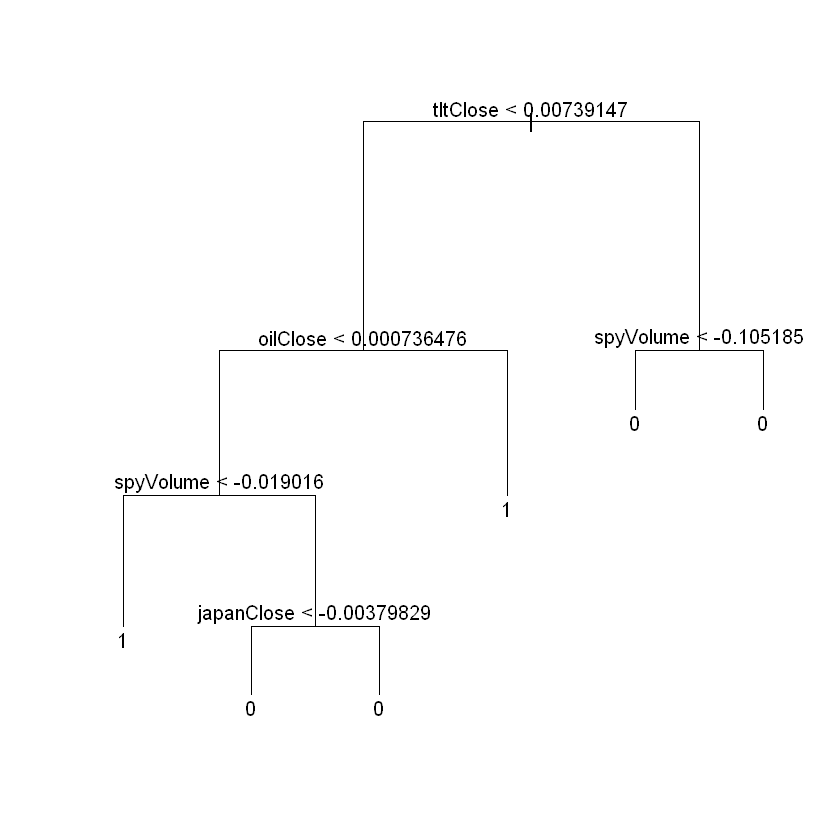

In [36]:
plot(tree.stocks)
text(tree.stocks, pretty=0)


In [37]:

tree.stocks


node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 1150 1586.00 1 ( 0.4565 0.5435 )  
   2) tltClose < 0.00739147 973 1315.00 1 ( 0.4070 0.5930 )  
     4) oilClose < 0.000736476 451  624.80 0 ( 0.5144 0.4856 )  
       8) spyVolume < -0.019016 227  300.20 1 ( 0.3744 0.6256 ) *
       9) spyVolume > -0.019016 224  288.30 0 ( 0.6562 0.3438 )  
        18) japanClose < -0.00379829 76   66.30 0 ( 0.8421 0.1579 ) *
        19) japanClose > -0.00379829 148  203.00 0 ( 0.5608 0.4392 ) *
     5) oilClose > 0.000736476 522  649.80 1 ( 0.3142 0.6858 ) *
   3) tltClose > 0.00739147 177  206.90 0 ( 0.7288 0.2712 )  
     6) spyVolume < -0.105185 51   70.68 0 ( 0.5098 0.4902 ) *
     7) spyVolume > -0.105185 126  119.80 0 ( 0.8175 0.1825 ) *

In [38]:


tree.pred=predict(tree.stocks, testzz, type = "class")

tree.pred=predict(tree.stocks, testzz, type = "vector")[,2]
#table(tree.pred, testzz$change)#Produces Garbage, ignore
#its not usable, you have to convert the regression numerical into a
#

newTree<-ifelse(tree.pred>0.5, 1, 0)

table(newTree, testzz$change)

       
newTree  0  1
      0 11  4
      1 11 24

In [39]:
#Confusion Matrix ratio
tree.confusion.Ratio<-(table(newTree, testzz$change)[1,1]+table(newTree, testzz$change)[2,2])/sum(table(newTree, testzz$change))

tree.confusion.Ratio

[1] 0.7

In [ ]:
############
######Can we improve with Pruning?
###########

In [10]:
set.seed(7)

In [41]:
cv.tree.stocks=cv.tree(tree.stocks, FUN=prune.misclass)
cv.tree.stocks
#NOTE dev= CrossValidation Error
#Seems like 6 and 4 Nodes result in lowest cross validation error

$size
[1] 6 4 2 1

$dev
[1] 429 429 481 522

$k
[1] -Inf    0   35   81

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

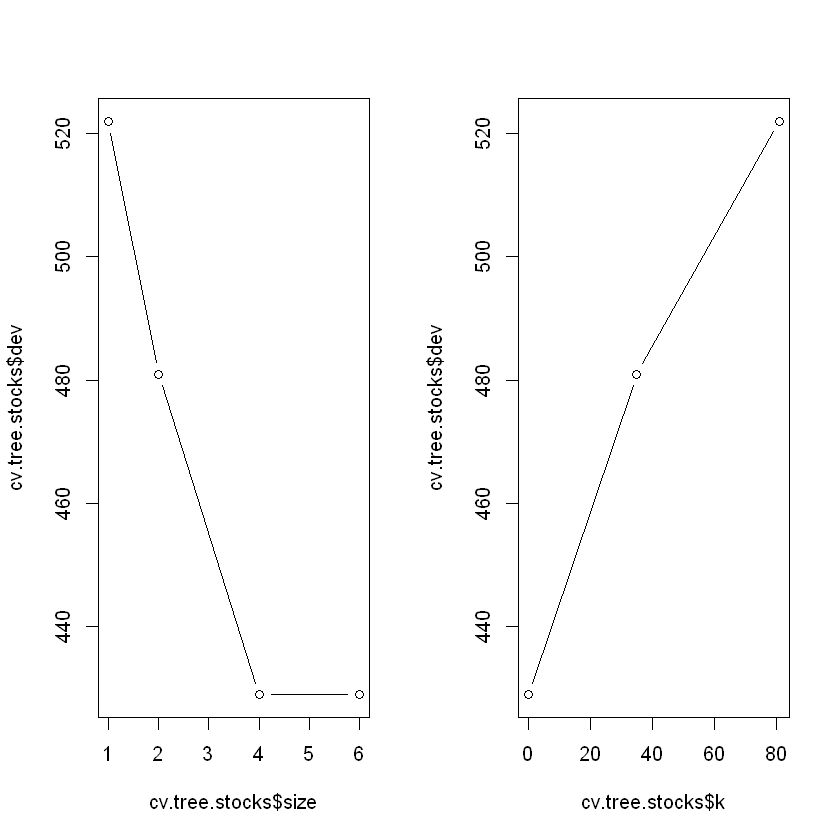

In [44]:
par(mfrow=c(1,2))
plot(cv.tree.stocks$size ,cv.tree.stocks$dev ,type="b")
plot(cv.tree.stocks$k ,cv.tree.stocks$dev ,type="b")


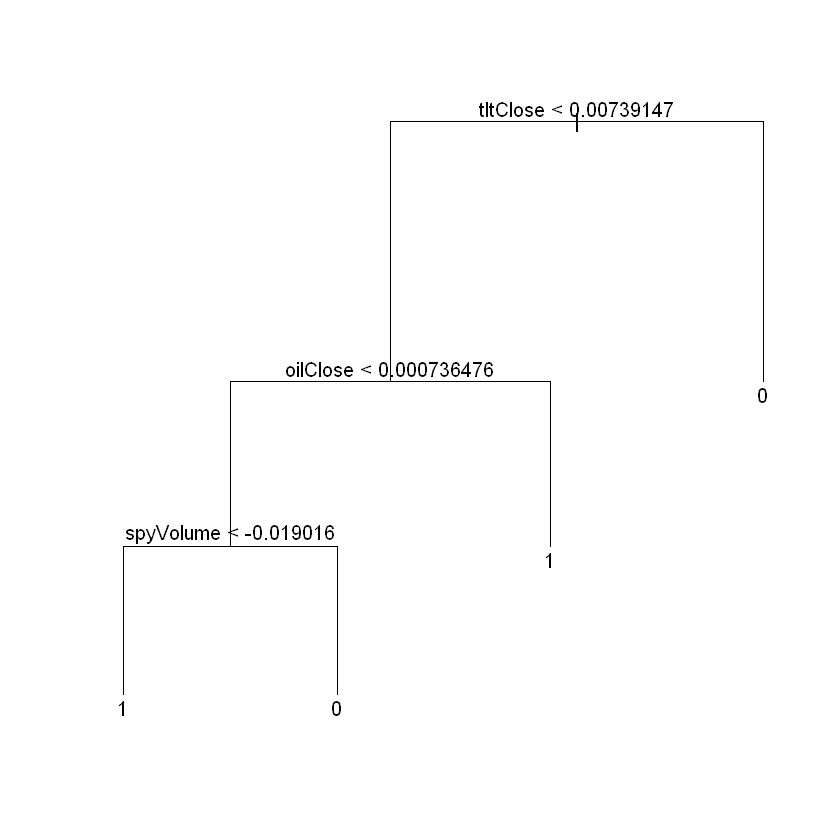

In [49]:
prune.tree.stocks=prune.misclass(tree.stocks,best=4)
plot(prune.tree.stocks )
text(prune.tree.stocks ,pretty =0)


In [50]:
#tree.pred=predict(prune.tree.stocks, testzz, type = "class")

tree.pred=predict(prune.tree.stocks, testzz, type = "vector")[,2]
#table(tree.pred, testzz$change)#Produces Garbage, ignore
#its not usable, you have to convert the regression numerical into a

tree.pred<-ifelse(tree.pred>0.5, 1, 0)
table(tree.pred, testzz$change)
#Confusion Matrix ratio
tree.confusion.Ratio<-(table(tree.pred, testzz$change)[1,1]+table(tree.pred, testzz$change)[2,2])/sum(table(tree.pred, testzz$change))

tree.confusion.Ratio

         
tree.pred  0  1
        0 11  4
        1 11 24

[1] 0.7

In [ ]:
#Weird that Pruning made no difference?
##I should come back and test this a couple different ways to make sure this 
##is totally correct or did I miss-code something

In [ ]:
##################################
#############################
#Random FORREST Section
#############################
##################################

In [7]:
#This may be better for this

newesttrain<-trainV2[,c(6, 16, 22, 40, 49)]
newesttest<-testV2[,c(6, 16, 22, 40, 49)]
newAllSet<-newPrecentScaled[,c(6, 16, 22, 40, 49)]


names(newPrecentScaled)

names(newesttrain)
names(newAllSet)
class(newAllSet)
class(newesttrain)

[1] "spyOpen"          "spyHigh"          "spyLow"           "spyClose"        
 [5] "spyAdj.Close"     "spyVolume"        "goldOpen"         "goldHigh"        
 [9] "goldLow"          "goldClose"        "goldAdj.Close"    "goldVolume"      
[13] "oilOpen"          "oilHigh"          "oilLow"           "oilClose"        
[17] "oilAdj.Close"     "oilVolume"        "japanOpen"        "japanHigh"       
[21] "japanLow"         "japanClose"       "japanAdj.Close"   "japanVolume"     
[25] "btcOpen"          "btcHigh"          "btcLow"           "btcClose"        
[29] "btcAdj.Close"     "btcVolume"        "lqdOpen"          "lqdHigh"         
[33] "lqdLow"           "lqdClose"         "lqdAdj.Close"     "lqdVolume"       
[37] "tltOpen"          "tltHigh"          "tltLow"           "tltClose"        
[41] "tltAdj.Close"     "tltVolume"        "euroUSDOpen"      "euroUSDHigh"     
[45] "euroUSDLow"       "euroUSDClose"     "euroUSDAdj.Close" "euroUSDVolume"   
[49] "change"

[1] "spyVolume"  "oilClose"   "japanClose" "tltClose"   "change"

[1] "spyVolume"  "oilClose"   "japanClose" "tltClose"   "change"

[1] "data.frame"

[1] "data.frame"

In [8]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [84]:
set.seed(1)

bag.stocks=randomForest(change~., data=newAllSet,subset=newesttrain, mytr=4, importance=TRUE)

ERROR: Error in xj[i]: invalid subscript type 'list'


In [86]:
bag.stocks
(272+448)/(177+448+272+253)


Call:
 randomForest(formula = change ~ spyVolume + oilClose + japanClose +      tltClose, data = trainzz) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 37.39%
Confusion matrix:
    0   1 class.error
0 272 253   0.4819048
1 177 448   0.2832000

[1] 0.626087

In [94]:
prstocks=predict(bag.stocks, newdata=newesttest)
#plot(prstocks, newesttest$change)
#albine(0,1)
mean((prstocks-newesttest$change)^2)

Warning message in Ops.factor(prstocks, newesttest$change):
"'-' not meaningful for factors"

[1] NA

In [ ]:
##################################
#############################
#SVM Section
#############################
##################################

In [ ]:
##################################
#############################
#KNN Section
#############################
##################################

In [ ]:
##################################
#############################
#Xboost Linear Section
#############################
##################################

In [ ]:
##################################
#############################
#MODEL COMPARISON
#############################
##################################

In [10]:
library(caret)


class(newPrecentScaled$change) 

newPrecentScaled$change = as.factor(newPrecentScaled$change)


set.seed(123456)

rows= sample(1:nrow(newPrecentScaled),size = 0.7*nrow(newPrecentScaled), replace=FALSE) 

train = newPrecentScaled[rows,]
test = newPrecentScaled[-rows,]
#names(train)
train<-train[,c(6, 16, 18, 22, 35, 40, 49)]
test<-test[,c(6, 16, 18, 22, 35, 40, 49)]
head(train)


#4 Parameter from Subset Information
#train<-train[,c(6, 16, 22, 40, 49)]
#test<-test[,c(6, 16, 22, 40, 49)]

trainX<-train[,-5]
trainY<-train[,5]
head(train)

seed<-7

[1] "factor"

,spyVolume,oilClose,oilVolume,japanClose,lqdAdj.Close,tltClose,change
1085,0.5119028,2.7717939,-0.08338178,0.21601561,-2.8833443,-1.7267110,0
235,0.8716557,0.9519129,-0.07974187,0.25263360,-1.7152710,-2.1604106,1
1067,-0.6134248,-0.4771239,-0.10723546,0.54778889,-1.2229879,-1.2283126,1
1151,-1.4859713,-1.1873273,-0.44143880,0.87100157,0.1384433,-0.6459084,1
712,-0.4749031,0.1364340,-0.16327649,-0.07594813,0.7989619,0.4696975,1
238,-1.4229789,-0.7462512,0.44679790,-0.22157824,0.1047699,-0.5321841,1


,spyVolume,oilClose,oilVolume,japanClose,lqdAdj.Close,tltClose,change
1085,0.5119028,2.7717939,-0.08338178,0.21601561,-2.8833443,-1.7267110,0
235,0.8716557,0.9519129,-0.07974187,0.25263360,-1.7152710,-2.1604106,1
1067,-0.6134248,-0.4771239,-0.10723546,0.54778889,-1.2229879,-1.2283126,1
1151,-1.4859713,-1.1873273,-0.44143880,0.87100157,0.1384433,-0.6459084,1
712,-0.4749031,0.1364340,-0.16327649,-0.07594813,0.7989619,0.4696975,1
238,-1.4229789,-0.7462512,0.44679790,-0.22157824,0.1047699,-0.5321841,1


In [ ]:
seed<-7

mytrain=trainControl(method="repeatedcv",number=10, repeats=10)
set.seed(seed)
model_logistic= train(change~., data=train,
                      method="glm",
                      preProcess = c("center", "scale"),
                      trControl=mytrain) 
set.seed(seed)
model_knn= train(change~., data=train,
                 method="knn",
                 preProcess = c("scale", "center"),
                 trControl=mytrain,
                 tuneLength = 15)

set.seed(seed)



grid <- expand.grid(sigma = c(.01, .015, 0.2),
                    C = c(0.75, 0.9, 1, 1.1, 1.25)
)


svmGrid <- expand.grid(sigma= 2^c(-25, -20, -15,-10, -5, 0), C= 2^c(0:5))

model_svm= train(change~., data=train,
                 method="svmRadial",
                 trControl=mytrain,
                 preProcess = c("center", "scale"),
                 tuneLength = 10,
                 #tuneGrid=grid
                 tuneGrid=svmGrid
                ) 


set.seed(seed)
model_lda <- train(change~., 
                  data=train,  
                  method="lda",
                  trControl=mytrain)

set.seed(seed)
model_qda <- train(change~., 
                  data=train,  
                  method="qda",
                  trControl=mytrain)

set.seed(seed)
gbmGrid <-  expand.grid(interaction.depth = c(1, 5, 9), 
                        n.trees = (1:30)*50, 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)
model_gbm <- train(change~., data=train,
                   method="gbm",
                   trControl=mytrain,
                   tuneGrid= gbmGrid)


set.seed(seed)
model_rf <- train(change~., data=train, method="rf", trControl=mytrain)

# Random Search
control <- trainControl(method="repeatedcv", number=10, repeats=10, search="random")
set.seed(seed)
model_rf <- train(change~., data=train, method="rf",
                  metric="Accuracy",
                  tuneLength=8, 
                  #tuneGrid=grid,
                  trControl=control)


set.seed(seed)
model_treebag <- train(change~., data=train, method="treebag", trControl=mytrain)


set.seed(seed)
model_svmPoly <- train(change~., data=train, method="svmPoly", trControl=mytrain)


set.seed(seed)
model_svmLinear <- train(change~., data=train, method="svmLinear", trControl=mytrain)


set.seed(seed)
model_stepLDA <- train(change~.,
                       data=train,
                       method="stepLDA",
                        tuneGrid= model_stepLDA$bestTune,
                        preProc=c("center", "scale"),
                       trControl=mytrain)

set.seed(seed)
model_stepLDA2 <- train(change~.,
                       data=train,
                       method="stepLDA",
                        tuneGrid= model_stepLDA$bestTune,
                        preProc=c("center", "scale"),
                       trControl=mytrain)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3732             nan     0.1000    0.0011
     2        1.3603             nan     0.1000    0.0062
     3        1.3495             nan     0.1000    0.0038
     4        1.3395             nan     0.1000    0.0028
     5        1.3315             nan     0.1000    0.0025
     6        1.3220             nan     0.1000    0.0033
     7        1.3155             nan     0.1000    0.0010
     8        1.3072             nan     0.1000    0.0033
     9        1.3019             nan     0.1000    0.0024
    10        1.2957             nan     0.1000    0.0026
    20        1.2491             nan     0.1000   -0.0005
    40        1.1873             nan     0.1000    0.0001
    60        1.1453             nan     0.1000   -0.0001
    80        1.1137             nan     0.1000   -0.0009
   100        1.0880             nan     0.1000   -0.0006
   120        1.0673             nan     0.1000   -0.0004
   140        


Call:
summary.resamples(object = result)

Models: logistic, qda, lda, svmRadial, svmLinear, svmPoly, gbm, knn, rf, treebag 
Number of resamples: 10 

Accuracy 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logistic  0.5833333 0.6934524 0.7440476 0.7298675 0.7687894 0.8452381    0
qda       0.6309524 0.6428571 0.6886116 0.6844730 0.7256303 0.7380952    0
lda       0.6190476 0.7053571 0.7337535 0.7345878 0.7708333 0.8333333    0
svmRadial 0.5833333 0.7180672 0.7425416 0.7238304 0.7589286 0.7857143    0
svmLinear 0.6785714 0.7053571 0.7396359 0.7345881 0.7589286 0.7951807    0
svmPoly   0.6309524 0.6964286 0.7261905 0.7226833 0.7477941 0.7951807    0
gbm       0.6190476 0.6964286 0.7202381 0.7118973 0.7373064 0.7619048    0
knn       0.6309524 0.6547619 0.7005881 0.6892353 0.7232143 0.7411765    0
rf        0.6428571 0.6904762 0.7023810 0.6916726 0.7050070 0.7261905    0
treebag   0.6309524 0.6428571 0.6726190 0.6749636 0.7014845 0.7294118    0

Kappa 
      

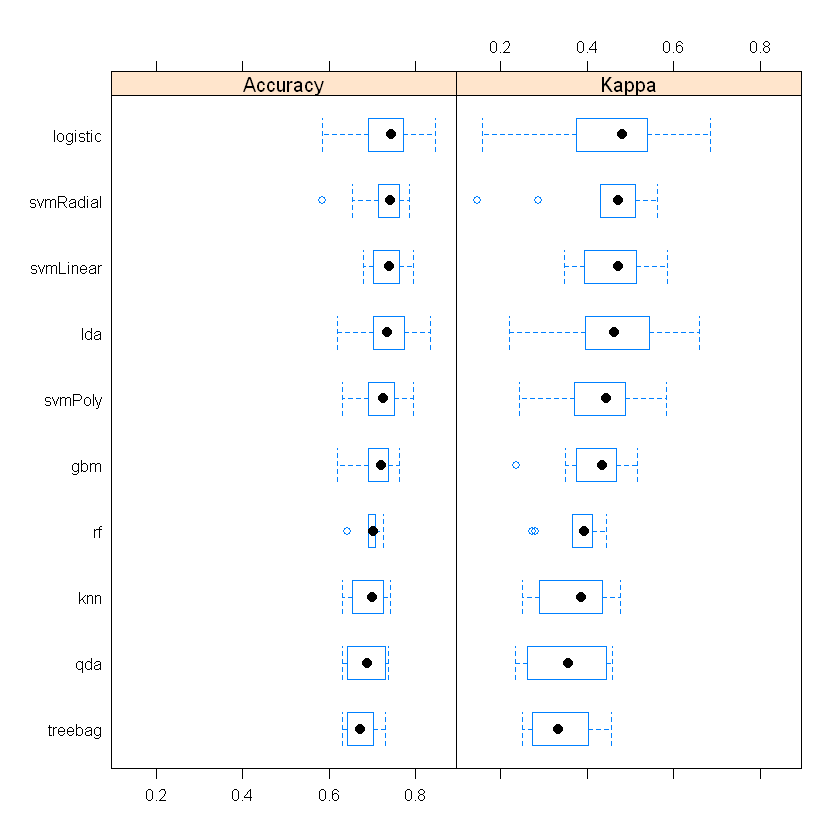

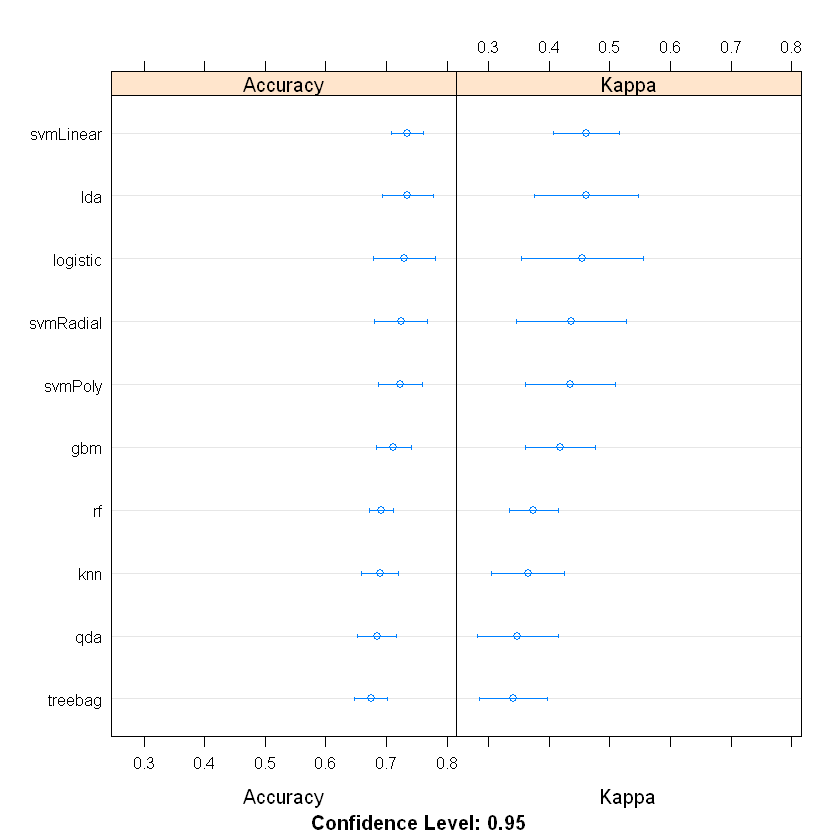

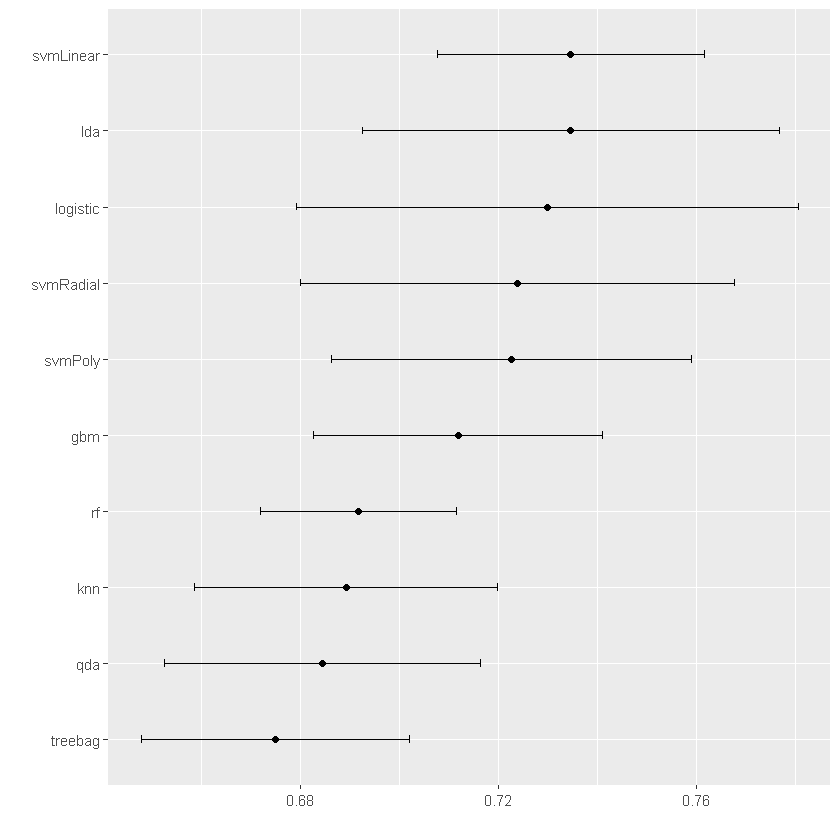

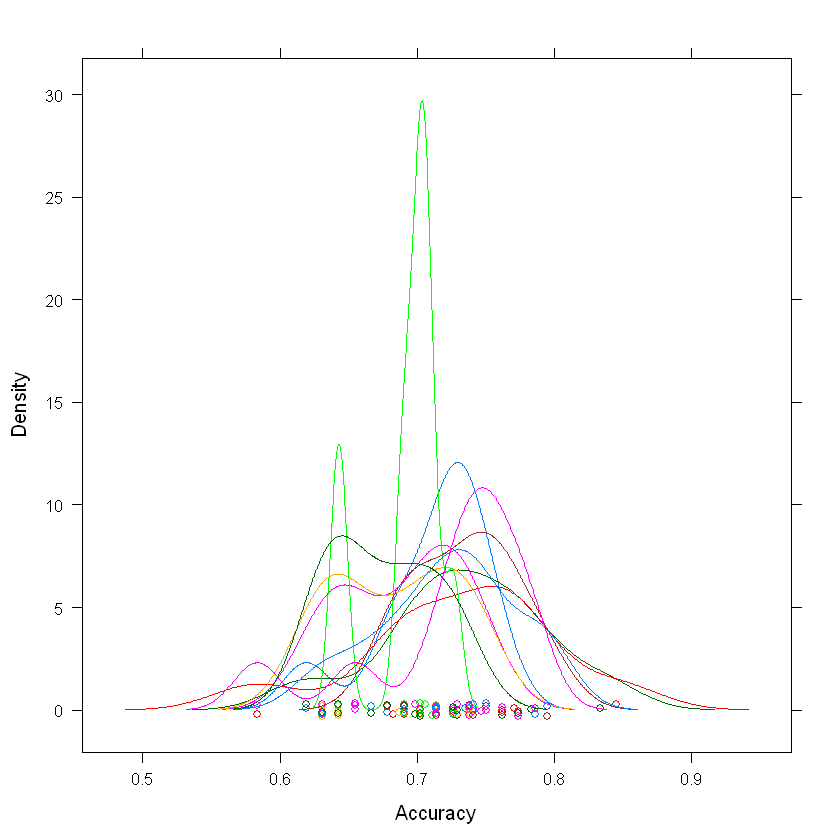

In [36]:

model_list = list(logistic = model_logistic,
                  qda=model_qda, 
                  lda=model_lda,
                  #lasso=model_lasso,
                  svmRadial=model_svm,
                  svmLinear=model_svmLinear,
                  svmPoly=model_svmPoly,
                  gbm=model_gbm,
                  knn= model_knn,
                  rf=model_rf,
                  treebag=model_treebag,
                  model_stepLDA<-model_stepLDA2
                  #ridge=model_ridge
                  )

#rf=model_rf, Note I cannot add RF for some reason, as teja about this and how to improve this?
set.seed(3)
result=resamples(model_list)

summary(result) 
bwplot(result)
dotplot(result)
ggplot(result)
densityplot(result, metric = "Accuracy" )#need labels

In [33]:
tune.grid.svmLinear<- expand.grid (C=c( 1 ,3 ,5 ,7),
            sigma = c(0.0005 ,0.001 ,0.005 ,0.01 ,0.05) )

model_svmLinear <- train(change~., data=train,
                         method = "svmLinear",
                         trControl = trainControl("cv", number = 10),
                         tuneGrid = tune.grid.svmLinear,
                         preProcess = c("center","scale"))

model_list = list(logistic = model_logistic,
                  qda=model_qda, 
                  lda=model_lda,
                  #lasso=model_lasso,
                  svm=model_svmLinear,
                  gbm=model_gbm,
                  knn= model_knn,
                  rf=model_rf,
                  treebag=model_treebag
                  #ridge=model_ridge
                  )

#rf=model_rf, Note I cannot add RF for some reason, as teja about this and how to improve this?

result=resamples(model_list)

summary(result) 
bwplot(result)
dotplot(result)
ggplot(result)

ERROR: Error: The tuning parameter grid should have columns C


In [26]:

model_svmLinear <-train(change~., data=train, method="svmLinear",  trControl =mytrain,
             preProcess = c("center","scale"),
              tuneGrid = expand.grid(C = seq(0, 2, length = 20)))

Warning message:
"model fit failed for Fold01.Rep1: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: C=0.0000 Err


Call:
summary.resamples(object = resamps)

Models: Linear, Poly, Radial 
Number of resamples: 10 

Accuracy 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Linear 0.6071429 0.7083333 0.7396359 0.7345594 0.7658133 0.8452381    0
Poly   0.6309524 0.6964286 0.7261905 0.7226833 0.7477941 0.7951807    0
Radial 0.5833333 0.7180672 0.7425416 0.7238304 0.7589286 0.7857143    0

Kappa 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Linear 0.1979167 0.4101760 0.4735242 0.4614923 0.5262947 0.6829268    0
Poly   0.2439024 0.3807761 0.4448676 0.4343925 0.4850478 0.5831610    0
Radial 0.1463415 0.4362035 0.4727105 0.4372399 0.5059037 0.5617391    0


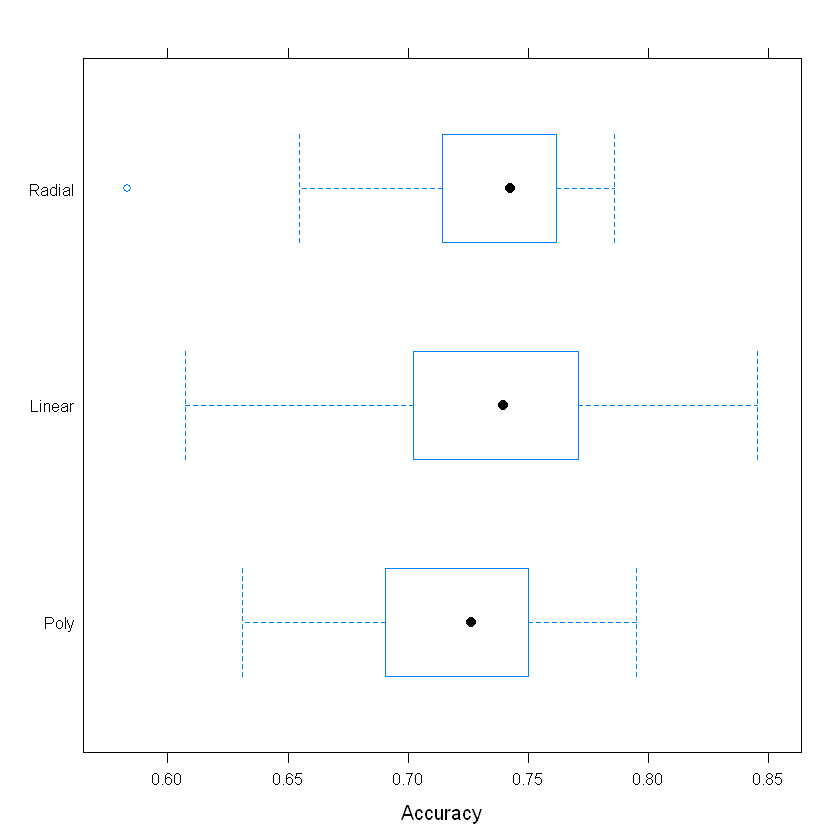

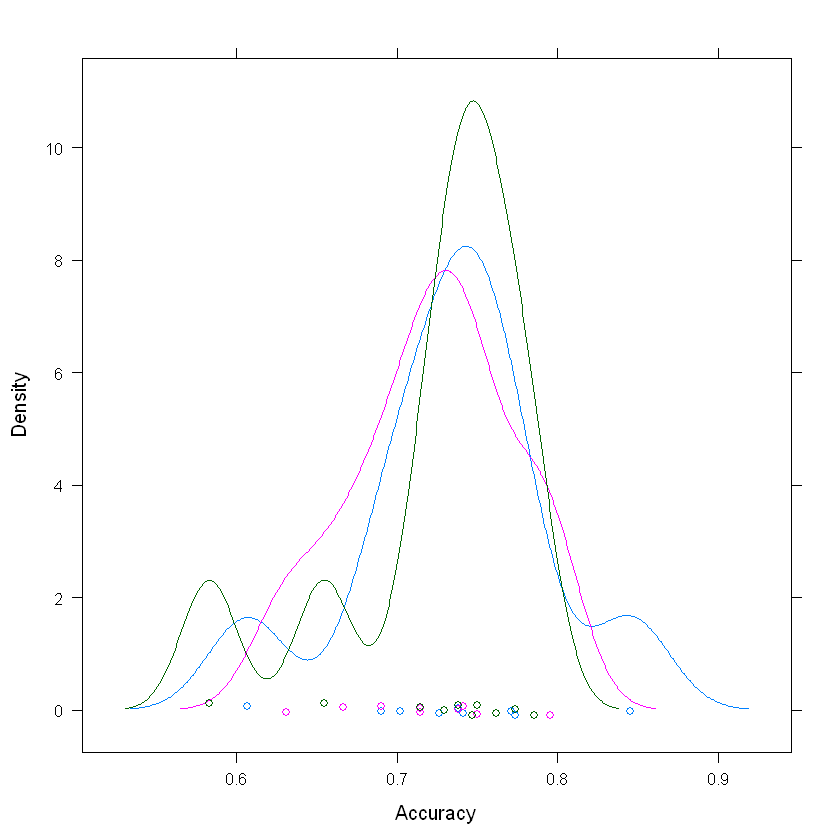

In [23]:
svmGrid <- expand.grid(sigma= 2^c(-25, -20, -15,-10, -5, 0), C= 2^c(0:5))
tune.grid.svmRdialWeights<- expand.grid ( C = c( 1 ,3 ,5 ,10 ,20) ,
            Weight = c(0.1 ,0.5 ,1 ,2 ,3 ,5 ,10) ,
            sigma = c(0.0005 ,0.001 ,0.005 ,0.01 ,0.05) )

model_svm= train(change~., data=train,
                 method="svmRadialWeights",
                 trControl=mytrain,
                 preProcess = c("center", "scale"),
                 tuneLength = 10,
                 #tuneGrid=grid
                 tuneGrid=tune.grid.svmRdialWeights
                ) 


set.seed(seed)
model_svmPoly <- train(change~., data=train, method="svmPoly", trControl=mytrain)


set.seed(seed)
model_svmLinear <- train(change~., data=train, method="svmLinear", trControl=mytrain)

svm2 <-train(change~., data=train, method="svmLinear",  trControl =mytrain,
             preProcess = c("center","scale"),
              tuneGrid = expand.grid(C = seq(0, 2, length = 20)))



resamps <- resamples(list(Linear = model_svmLinear, Poly = model_svmPoly , Radial = model_svm))
summary(resamps)
bwplot(resamps, metric = "Accuracy")
densityplot(resamps, metric = "Accuracy")


Call:
summary.resamples(object = result)

Models: logistic, qda, lda, svm, rf 
Number of resamples: 10 

Accuracy 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logistic 0.5833333 0.6934524 0.7440476 0.7298675 0.7687894 0.8452381    0
qda      0.6309524 0.6428571 0.6886116 0.6844730 0.7256303 0.7380952    0
lda      0.6190476 0.7053571 0.7337535 0.7345878 0.7708333 0.8333333    0
svm      0.6547619 0.6904762 0.6981793 0.7155825 0.7529762 0.7951807    0
rf       0.6428571 0.6904762 0.7023810 0.6916726 0.7050070 0.7261905    0

Kappa 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
logistic 0.1580756 0.3813888 0.4806176 0.4545563 0.5329754 0.6840278    0
qda      0.2332155 0.2631511 0.3553363 0.3480963 0.4357871 0.4586995    0
lda      0.2208696 0.4028355 0.4631735 0.4619278 0.5358993 0.6591304    0
svm      0.2926829 0.3669565 0.3855323 0.4189007 0.4916581 0.5848779    0
rf       0.2720971 0.3669337 0.3934124 0.3746409 0.4092082 0.4

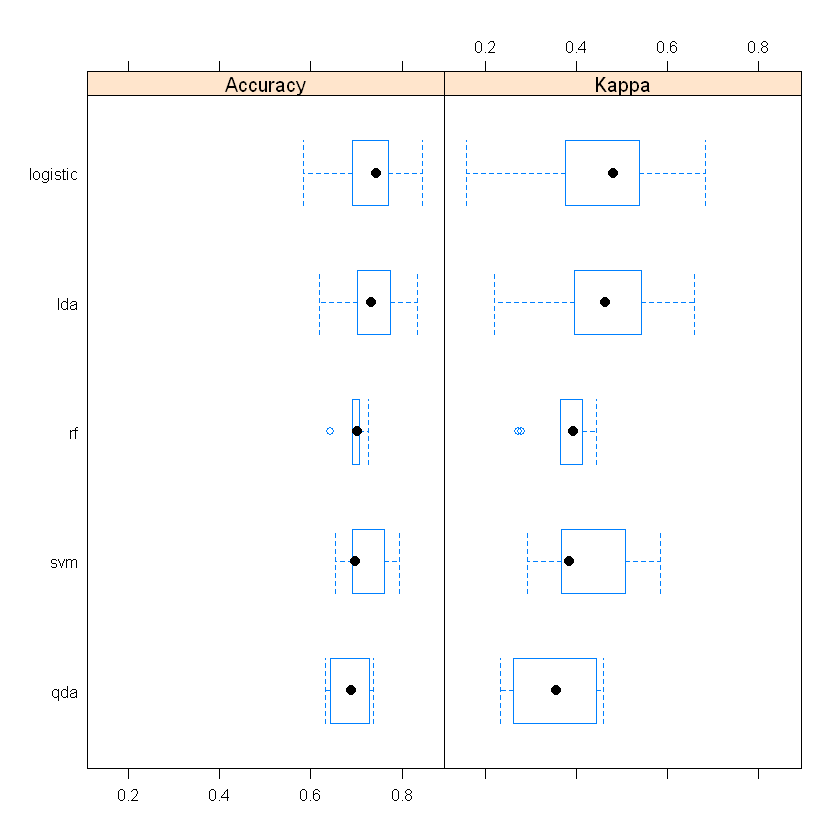

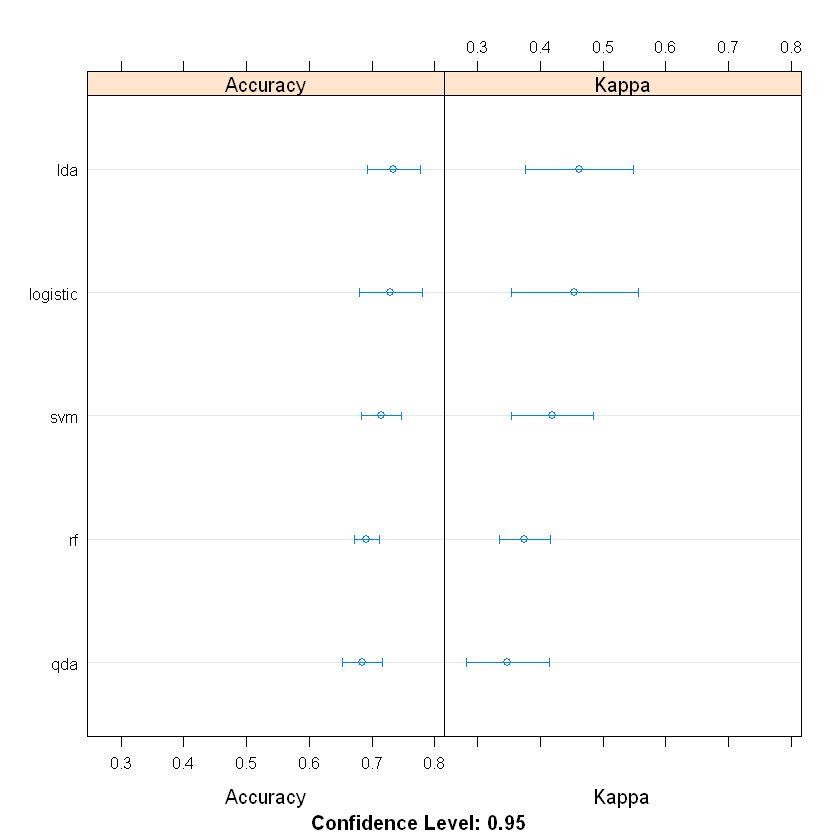

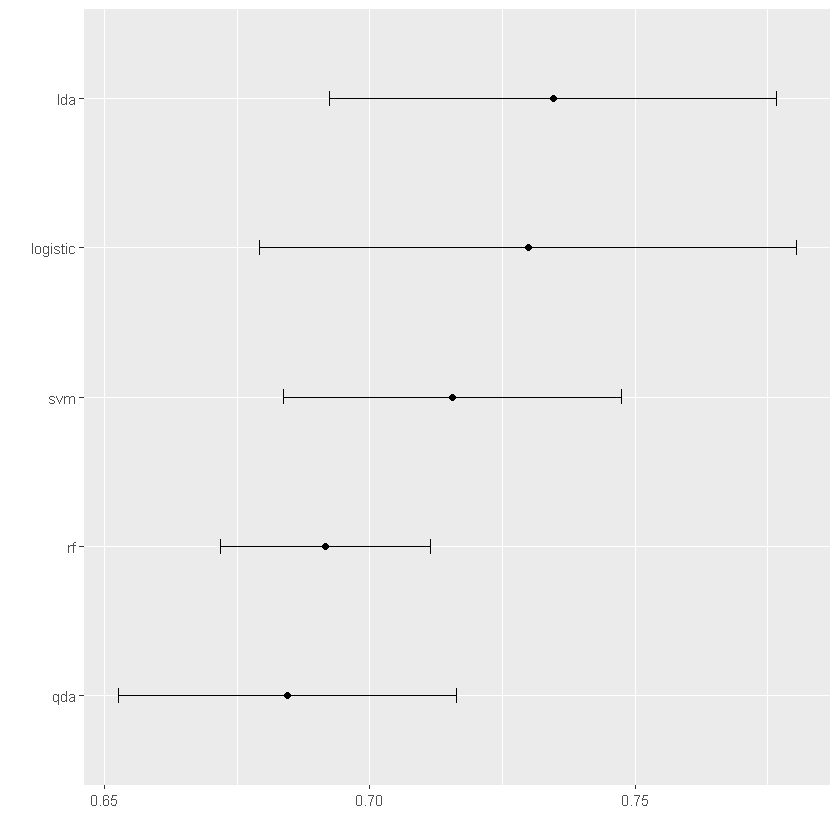

In [64]:
############
#MADE FOR ROC
#########

mytrain <- trainControl(method = "repeatedcv",   # 10fold cross validation
                     number = 10,# do 12 repititions of cv
                     summaryFunction=twoClassSummary,# Use AUC to pick the best model
                     classProbs=TRUE
                   #  allowParallel = TRUE
                    
                    )

#mytrain=trainControl(method="cv",number=10)

gbmGrid <-  expand.grid(interaction.depth = c(1, 5, 9), 
                        n.trees = (1:30)*50, 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)



levels(train$change)=c("Up","Down")
#
set.seed(seed)
model_logistic= train(change~., data=train, method="glm",trControl=mytrain) 
set.seed(seed)
#model_lasso <- train(trainX, trainY, method = "glmnet", 
#                             trControl = mytrain, metric = "ROC",
#                             tuneGrid = expand.grid(alpha = 1,
#                                                    lambda = seq(0.001,0.1,by = 0.001)))

set.seed(seed)
model_knn= train(change~., data=train,
                 method="knn",
                 preProcess = c("scale", "center"),
                 trControl=mytrain,
                 tuneLength = 20)#it was 8 before

grid <- expand.grid(sigma = c(.01, .015, 0.2),
                    C = c(0.75, 0.9, 1, 1.1, 1.25)
)
model_svm= train(change~., data=train, method="svmRadial",trControl=mytrain, tuneGrid=grid) 

set.seed(seed)
model_gbm <- train(change~., data=train, method="gbm", trControl=mytrain, tuneGrid= gbmGrid)
set.seed(seed)
model_rf <- train(change~., data=train, method="rf", trControl=mytrain)
set.seed(seed)
model_treebag <- train(change~., data=train, method="treebag", trControl=mytrain)
set.seed(seed)
model_svmPoly <- train(change~., data=train, method="svmPoly", trControl=mytrain)
set.seed(seed)
model_svmLinear <-train(change~., data=train, method="svmLinear",  trControl =mytrain,
             preProcess = c("center","scale"),
              tuneGrid = expand.grid(C = seq(0, 2, length = 20)))
#model_lasso <- train(change~., data=train, method = "glmnet", 
#                             trControl = mytrain, 
#                             metric = "ROC",
#                             tuneGrid = expand.grid(alpha = 1,
#                                                    lambda = seq(0.001,0.1,by = 0.001)))

Grid <- expand.grid(mtry = seq(4,16,4))
fit.rf <- train(change~., data=train, method='rf', trControl=mytrain,tuneGrid=Grid)


Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3682             nan     0.1000    0.0036
     2        1.3558             nan     0.1000    0.0040
     3        1.3416             nan     0.1000    0.0051
     4        1.3309             nan     0.1000    0.0033
     5        1.3215             nan     0.1000    0.0028
     6        1.3138             nan     0.1000    0.0040
     7        1.3046             nan     0.1000    0.0023
     8        1.2968             nan     0.1000    0.0029
     9        1.2895             nan     0.1000    0.0016
    10        1.2836             nan     0.1000    0.0018
    20        1.2361             nan     0.1000    0.0011
    40        1.1770             nan     0.1000   -0.0016
    60        1.1355             nan     0.1000    0.0003
    80        1.1018             nan     0.1000   -0.0002
   100        1.0775             nan     0.1000   -0.0000
   120        1.0566             nan     0.1000   -0.0009
   140        

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message:
"model fit failed for Fold01.Rep1: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your paramete

In [68]:
set.seed(seed)
model_lda <- train(change~., data=train, method="lda", trControl=mytrain)
set.seed(seed)
model_qda <- train(change~., data=train, method="qda", trControl=mytrain)


Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

In [66]:
summary(fit.rf)

                Length Class      Mode     
call               4   -none-     call     
type               1   -none-     character
predicted        840   factor     numeric  
err.rate        1500   -none-     numeric  
confusion          6   -none-     numeric  
votes           1680   matrix     numeric  
oob.times        840   -none-     numeric  
classes            2   -none-     character
importance         6   -none-     numeric  
importanceSD       0   -none-     NULL     
localImportance    0   -none-     NULL     
proximity          0   -none-     NULL     
ntree              1   -none-     numeric  
mtry               1   -none-     numeric  
forest            14   -none-     list     
y                840   factor     numeric  
test               0   -none-     NULL     
inbag              0   -none-     NULL     
xNames             6   -none-     character
problemType        1   -none-     character
tuneValue          1   data.frame list     
obsLevels          2   -none-   

In [39]:
levels(train$change)=c("Up","Down")
    levels(test$change)=c("Up","Down")

mytrain <- trainControl(method = "repeatedcv",   # 10fold cross validation
                     number = 10,# do 12 repititions of cv
                     summaryFunction=twoClassSummary,# Use AUC to pick the best model
                     classProbs=TRUE
                   #  allowParallel = TRUE
                    
                    )

set.seed(seed)
model_lasso <- train(change~., data=train, method = "glmnet", 
                             trControl = mytrain, 
                             nlambda = 25,
                             metric="Accuracy",
                             #metric = "ROC",
                             tuneGrid = expand.grid(alpha = 1,
                                                    lambda = seq(0.001,0.1,by = 0.001)))

#########

set.seed(seed)
model_ridge <- train(change~., data=train, method = "glmnet", 
                             trControl = mytrain, 
                             nlambda = 25,
                             metric="Accuracy",
                             #metric = "ROC",
                             tuneGrid = expand.grid(alpha = 0,
                                                    lambda = seq(0.001,0.1,by = 0.001)))

model_list = list(#logistic = model_logistic,
                  lasso=model_lasso,
                  #knn= model_knn,
                  #svm=model_svm,
                  #gbm=model_gbm,
                  #rf=model_gbm,
                  #treebag=model_treebag
                  ridge=model_ridge
                  )


result=resamples(model_list)

summary(result) 
ridge.plot(train$change, train, lambda = seq(0, 2, by = 0.1) )

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."


Call:
summary.resamples(object = result)

Models: lasso, ridge 
Number of resamples: 10 

ROC 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lasso 0.7618234 0.7756410 0.8120339 0.8077209 0.8361823 0.8558405    0
ridge 0.7521368 0.7757835 0.8040629 0.8014109 0.8263533 0.8512821    0

Sens 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lasso 0.5128205 0.6217949 0.6923077 0.6711876 0.7307692 0.7948718    0
ridge 0.4358974 0.6153846 0.6666667 0.6428475 0.6858974 0.7948718    0

Spec 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lasso 0.6444444 0.7555556 0.7801932 0.7871498 0.8166667 0.9333333    0
ridge 0.7111111 0.7456522 0.8111111 0.8049275 0.8222222 0.9555556    0


ERROR: Error in ridge.plot(train$change, train, lambda = seq(0, 2, by = 0.1)): could not find function "ridge.plot"


In [94]:
#set.seed(seed)
#model_rf <- train(change~., data=train, method="rf", trControl=mytrain)


#set.seed(seed)
#model_treebag <- train(change~., data=train,
#                       nbagg = 100,
#                       method="treebag",
#                       trControl=mytrain)

#set.seed(seed)
#model_stepLDA <- train(change~.,
#                       data=train,
#                       method="stepLDA",
#                       trControl=mytrain)


set.seed(seed)
model_stepLDA <- train(change~.,
                       data=train,
                       method="stepLDA",
                        #tuneGrid= model_stepLDA$bestTune,
                        preProc=c("center", "scale"),
                       trControl=mytrain)



model_list2 = list(#logistic = model_logistic,
                  lasso=model_lasso,
                  #knn= model_knn,
                  #svm=model_svm,
                  gbm=model_gbm,
                  rf=model_gbm,
                  treebag=model_treebag,
                  ridge=model_ridge,
                    stepLDA=model_stepLDA,
                    stepLDA2=model_stepLDA2
                  )


result2=resamples(model_list2)

summary(result2) 



Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead." `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60442;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.71011;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.5 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61511;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69437;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.51 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61258;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68914;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.57 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60846;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.7063;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.64 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59989;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.6966;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.64 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60965;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69972;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.67 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60502;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68949;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.56 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60705;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70479;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.56 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59798;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69177;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.67 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59647;  in: "oilClose";  variables (1): oilClose 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
840 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60476;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69524;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.56 




Call:
summary.resamples(object = result2)

Models: lasso, gbm, rf, treebag, ridge, stepLDA, stepLDA2 
Number of resamples: 10 

ROC 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lasso    0.7618234 0.7756410 0.8120339 0.8077209 0.8361823 0.8558405    0
gbm      0.6871795 0.7545584 0.7857550 0.7780502 0.8134203 0.8210826    0
rf       0.6871795 0.7545584 0.7857550 0.7780502 0.8134203 0.8210826    0
treebag  0.6757835 0.7473909 0.7588319 0.7551412 0.7784900 0.7937570    0
ridge    0.7521368 0.7757835 0.8040629 0.8014109 0.8263533 0.8512821    0
stepLDA  0.5527066 0.7451567 0.7800570 0.7534457 0.8000372 0.8157895    0
stepLDA2 0.5527066 0.7451567 0.7800570 0.7534457 0.8000372 0.8157895    0

Sens 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lasso    0.5128205 0.6217949 0.6923077 0.6711876 0.7307692 0.7948718    0
gbm      0.5384615 0.5897436 0.6025641 0.6479757 0.7059717 0.8205128    0
rf       0.5384615 0.5897436 0.6025641 0.6479

In [ ]:
set.seed(seed)
grid <- expand.grid(sigma = c(.01, .015, 0.2),
                    C = c(0.75, 0.9, 1, 1.1, 1.25)
)
#model_svm= train(change~., data=train, tuneLength = 9, method="svmRadial",trControl=mytrain,  preProc = c("center","scale"), tuneGrid=grid) 

#bestmtry <- tuneRF(change~., data=train, stepFactor=1.5, improve=1e-5, ntree=500)


mtry <- sqrt((ncol(train)-1))
tunegrid <- expand.grid(.mtry=mtry)



# Random Search
control <- trainControl(method="repeatedcv", number=10, repeats=10, search="random")
set.seed(seed)
model_rf <- train(change~., data=train, method="rf",
                  metric="Accuracy",
                  tuneLength=8, 
                  #tuneGrid=grid,
                  trControl=control)
 




#set.seed(seed)
#model_logicBag= train(change~., data=train, method="logicBag",trControl=mytrain) 

#model_svm= train(change~., data=train, method="nb",trControl=mytrain) 
mytrain <- trainControl(method = "repeatedcv",   # 10fold cross validation
                     number = 10,# do 12 repititions of cv
                     summaryFunction=twoClassSummary,# Use AUC to pick the best model
                     classProbs=TRUE
                   #  allowParallel = TRUE
                    
                    )


set.seed(seed)
#model_ridge <- train(change~., data=train, method = "glmnet", 
#                             trControl = mytrain, 
#                             metric = "ROC",
#                             tuneGrid = expand.grid(alpha = 0,
#                                                    lambda = seq(0.001,0.1,by = 0.001)))


In [1]:
plot(model_knn)



model_list = list(logistic = model_logistic,
                  qda=model_qda, 
                  lda=model_lda,
                  lasso=model_lasso,
                  svmLinear=model_svmLinear,
                  svmRadial=model_svm,
                  svmPoly=model_svmPoly,
                  gbm=model_gbm,
                  knn= model_knn,
                  treebag=model_treebag,
                  ridge=model_ridge,
                   stepLDA=model_stepLDA,
                  fit.rf=fit.rf
                  )

#rf=model_rf, Note I cannot add RF for some reason, as teja about this and how to improve this?

result=resamples(model_list)

summary(result) 
bwplot(result)
dotplot(result)
ggplot(result)

ERROR: Error in plot(model_knn): object 'model_knn' not found


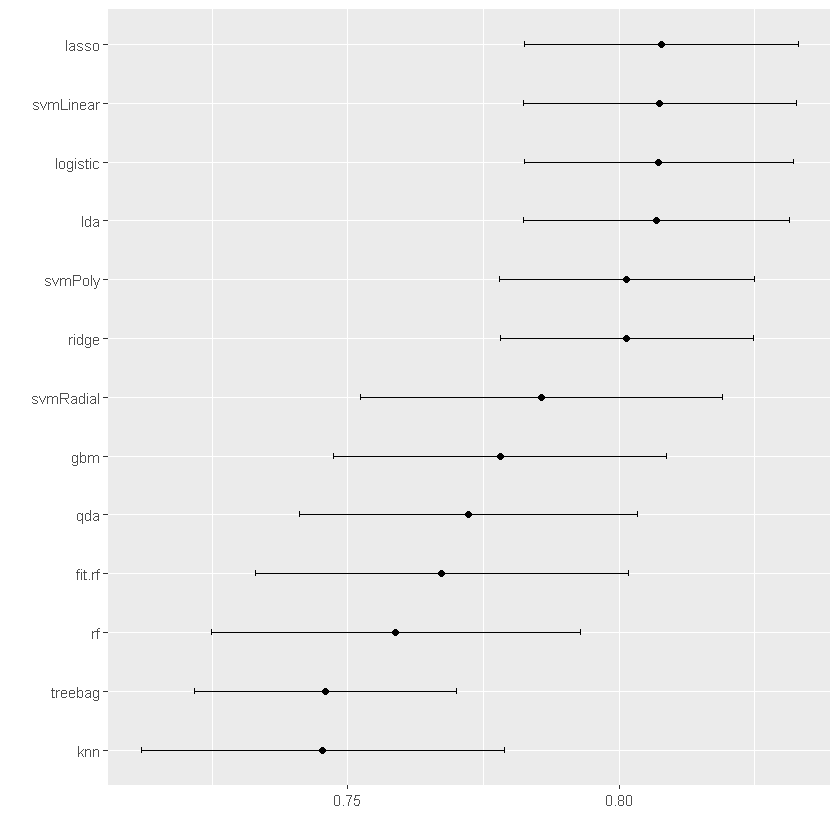

In [73]:
ggplot(result)

In [ ]:


levels(test$change)=c("Up","Down")

predict_svm  = predict (model_svmLinear, test) 

#predict_svm

confusionMatrix(predict_svm, test$change,positive = "Up" )



In [ ]:
plot(varImp(model_svmPoly, scale=FALSE))

In [ ]:
library(caretEnsemble)

In [ ]:
library(pROC)

In [ ]:


#expr_svm= train(change~., data=train,
#                method="svmRadial",
#                metric = "ROC",
#                tuneGrid=grid,
#                trControl=mytrain)




In [ ]:
ctrl <- trainControl(method="repeatedcv",   # 10fold cross validation
                     repeats=5,		    # do 5 repititions of cv
                     summaryFunction=twoClassSummary,	# Use AUC to pick the best model
                     classProbs=TRUE)

In [ ]:
head(train)

In [ ]:
head(trainY)

In [ ]:
ctrl <- trainControl(method="cv", summaryFunction=twoClassSummary, classProbs=T,
                     savePredictions = T)
train$change<-as.factor(train$change)
fit1 <- train(change~ .,data=train,method="rf",trControl=ctrl)


In [ ]:
grid <- expand.grid(sigma = c(.01, .015, 0.2),
                    C = c(0.75, 0.9, 1, 1.1, 1.25)
)
#trainY<-as.factor(trainY)

#trainY=ifelse(trainY>0, "Yes","No")
levels(train$change)=c("Up","Down")
expr_svm.tune<- train(change~., data=train,
                              method = "svmRadial",
                              tuneLength = 5,
                              metric = "ROC",
                              trControl = ctrl,
                              tuneGrid=grid,
                              verbose=FALSE
                     )
 expr_svm.tune

In [ ]:
expr_svm.tune$best
plot(expr_svm.tune)

ctrl <- trainControl(method="cv", 
                     summaryFunction=twoClassSummary, 
                     classProbs=T,
                     savePredictions = T)
rfFit <- train(change~ ., data=train, 
               method="rf", preProc=c("center", "scale"), 
               trControl=ctrl)
library(pROC)
# Select a parameter setting
head(rfFit$pred)

Warning message:
"package 'caTools' was built under R version 3.6.3"

,predict_gbm,predict_knn,predict_ridge,predict_lasso,predict_logistic,predict_rf,predict_treebag,predict_svm
Up vs. Down,0.7619063,0.7241509,0.7510026,0.7506266,0.750282,0.7293051,0.7108817,0.7511593


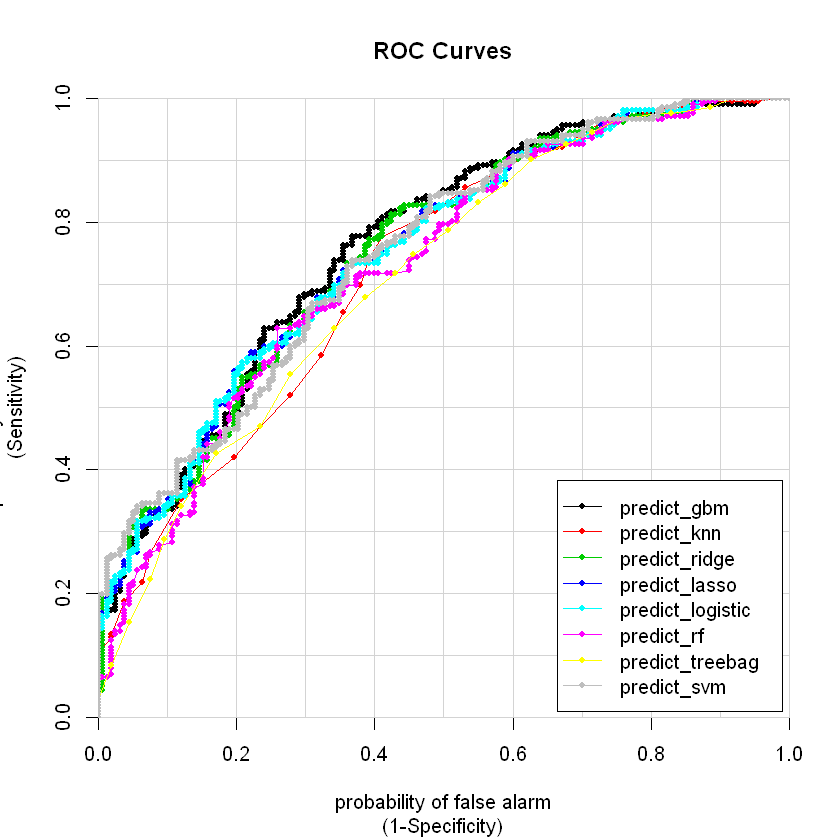

In [51]:
library(caTools)


predict_gbm<-predict(model_gbm,test,type="prob")[,2]#so first get the predicted probabilities of the final model
#we use type = "prob" because its the probabilities we need to get an ROC curve
predict_lasso<-predict(model_lasso,test,type="prob")[,2]


predict_ridge<-predict(model_ridge,test,type="prob")[,2]
predict_knn<-predict(model_knn,test,type="prob")[,2]
predict_svm<-predict(model_svm,test,type="prob")[,2]
predict_logistic<-predict(model_logistic,test,type="prob")[,2]
predict_rf<-predict(model_rf,test,type="prob")[,2]
predict_treebag<-predict(model_treebag,test,type="prob")[,2]
colAUC(cbind(predict_gbm,predict_knn,predict_ridge,predict_lasso,predict_logistic,predict_rf,predict_treebag,predict_svm), test$change, plotROC=TRUE) 



In [50]:
#selectedIndices <- rfFit$pred$mtry == 2
# Plot:
#plot.roc(rfFit$pred)
#ROC <- plot.roc(rfFit$pred$obs, rfFit$pred$N)
#coords(ROC, "b", ret="t", best.method="youden")


roc(train$change,rfFit[,"Yes"])

roc_svm_test <- roc(response = train$change, predictor =as.numeric(expr_svm.tune))
plot(roc_svm_test, add = TRUE,col = "red", print.auc=TRUE, print.auc.x = 0.5, print.auc.y = 0.3)

ERROR: Error in roc(train$change, rfFit[, "Yes"]): could not find function "roc"


In [ ]:


model_list = list(logistic = model_logistic,lasso=model_lasso,  knn= model_knn, svm=model_svm, gbm=model_gbm,  treebag=model_treebag, ridge=model_ridge)

#rf=model_rf, Note I cannot add RF for some reason, as teja about this and how to improve this?

result=resamples(model_list)

summary(result) 
plot(result)

In [ ]:
bwplot(result)
dotplot(result)

#you can make a bwplot i.e boxplot so that you can compare the model with best median value and least variance to select the best one

Confusion Matrix and Statistics

          Reference
Prediction  Up Down
      Up   100   53
      Down  58  149
                                         
               Accuracy : 0.6917         
                 95% CI : (0.6411, 0.739)
    No Information Rate : 0.5611         
    P-Value [Acc > NIR] : 2.583e-07      
                                         
                  Kappa : 0.3718         
                                         
 Mcnemar's Test P-Value : 0.7042         
                                         
            Sensitivity : 0.6329         
            Specificity : 0.7376         
         Pos Pred Value : 0.6536         
         Neg Pred Value : 0.7198         
             Prevalence : 0.4389         
         Detection Rate : 0.2778         
   Detection Prevalence : 0.4250         
      Balanced Accuracy : 0.6853         
                                         
       'Positive' Class : Up             
                                         

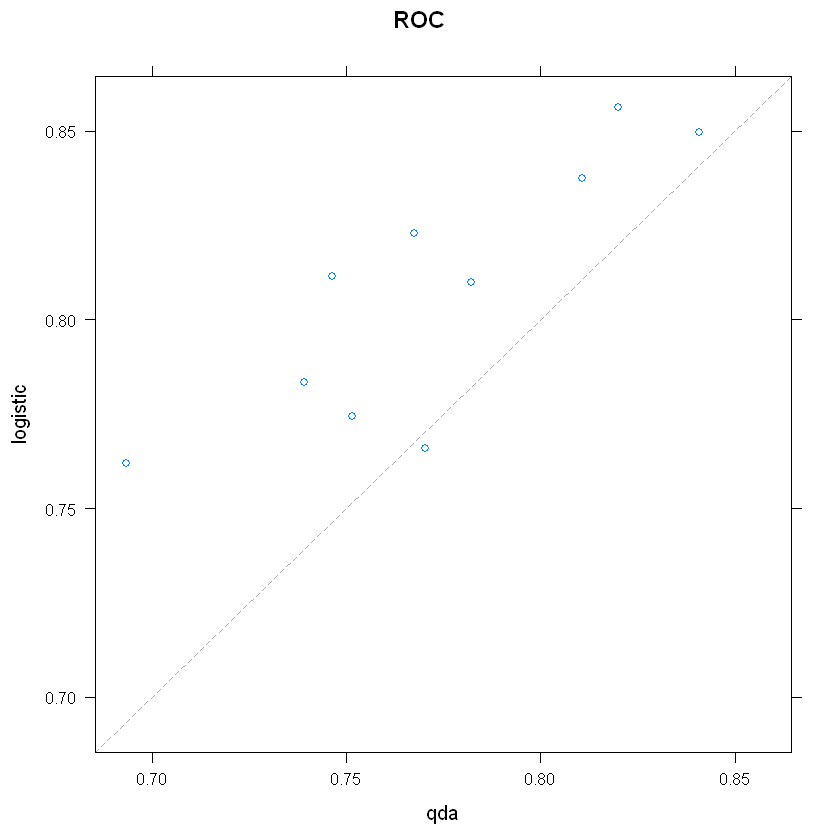

In [81]:
#test$change
predict_svm  = predict (model_svm, test) 

#predict_svm
confusionMatrix(predict_svm, test$change,positive = 'Up' )


#levels(test$change) 


xyplot(result)

Confusion Matrix and Statistics

          Reference
Prediction  Up Down
      Up   103   53
      Down  55  149
                                          
               Accuracy : 0.7             
                 95% CI : (0.6498, 0.7469)
    No Information Rate : 0.5611          
    P-Value [Acc > NIR] : 4.337e-08       
                                          
                  Kappa : 0.3901          
                                          
 Mcnemar's Test P-Value : 0.9233          
                                          
            Sensitivity : 0.6519          
            Specificity : 0.7376          
         Pos Pred Value : 0.6603          
         Neg Pred Value : 0.7304          
             Prevalence : 0.4389          
         Detection Rate : 0.2861          
   Detection Prevalence : 0.4333          
      Balanced Accuracy : 0.6948          
                                          
       'Positive' Class : Up              
                           

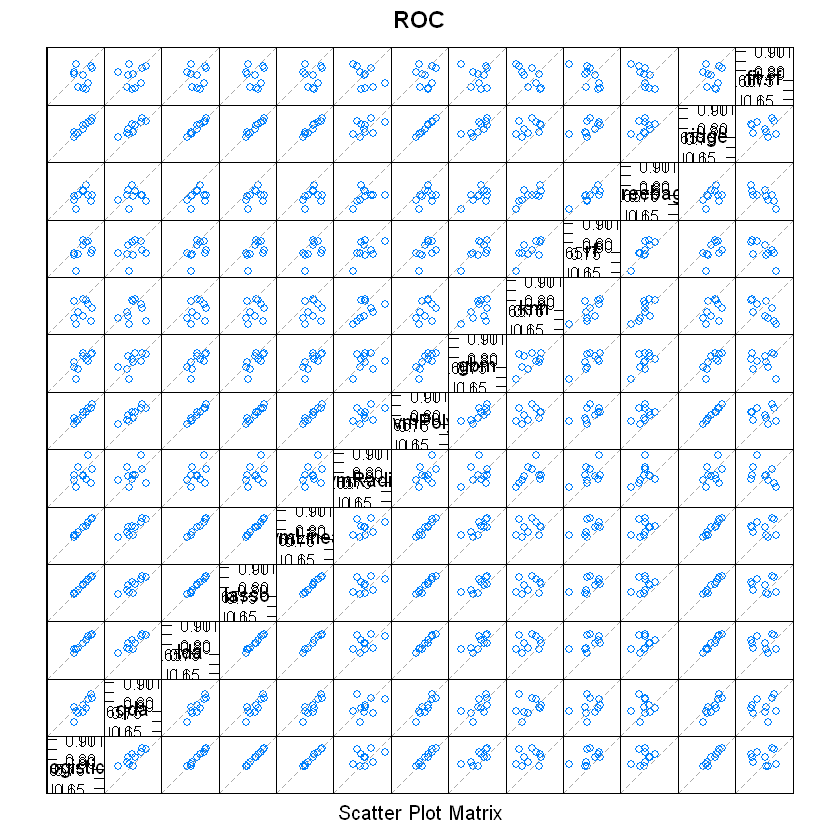

In [82]:
splom(result)
confusionMatrix(predict_gbm, test$change,positive = 'Up' )

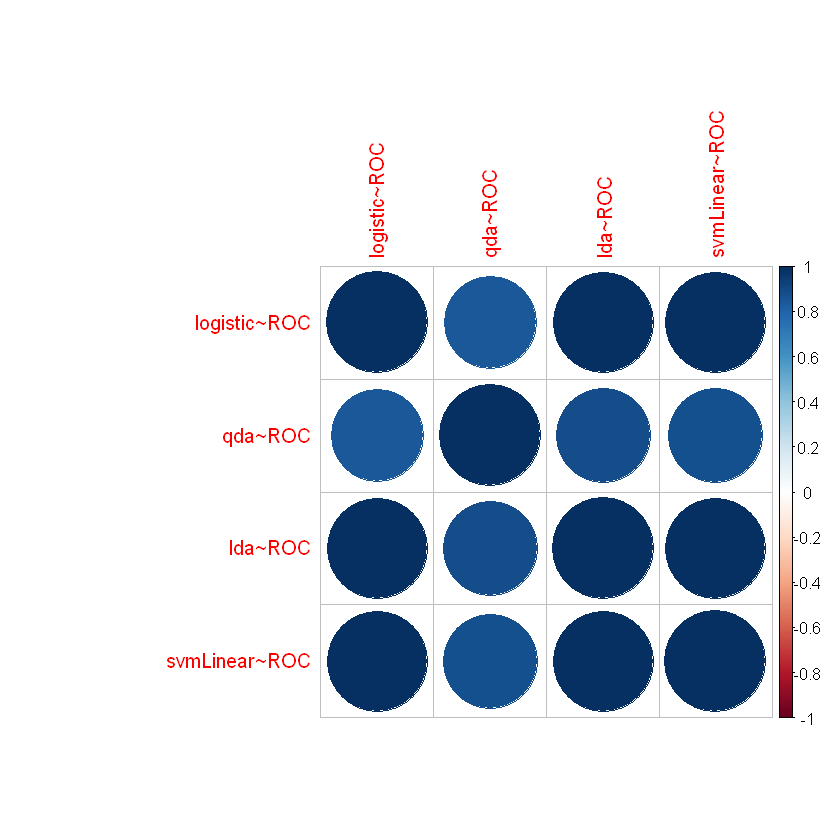

In [89]:
corrplot(cor(summary(result)$values[,c(1,4,7,13)]),method="circle")

In [72]:
predict_gbm  = predict ( model_gbm, test) 

confusionMatrix(predict_gbm, test$change,positive = 'Up' )
predict_logistic  = predict ( model_logistic, test) 


confusionMatrix(predict_logistic  , test$change,positive = 'Up' )


predict_ridge  = predict ( model_ridge, test) 


confusionMatrix(predict_ridge  , test$change,positive = 'Up' )



Confusion Matrix and Statistics

          Reference
Prediction  Up Down
      Up   103   53
      Down  55  149
                                          
               Accuracy : 0.7             
                 95% CI : (0.6498, 0.7469)
    No Information Rate : 0.5611          
    P-Value [Acc > NIR] : 4.337e-08       
                                          
                  Kappa : 0.3901          
                                          
 Mcnemar's Test P-Value : 0.9233          
                                          
            Sensitivity : 0.6519          
            Specificity : 0.7376          
         Pos Pred Value : 0.6603          
         Neg Pred Value : 0.7304          
             Prevalence : 0.4389          
         Detection Rate : 0.2861          
   Detection Prevalence : 0.4333          
      Balanced Accuracy : 0.6948          
                                          
       'Positive' Class : Up              
                           

Confusion Matrix and Statistics

          Reference
Prediction  Up Down
      Up    99   54
      Down  59  148
                                          
               Accuracy : 0.6861          
                 95% CI : (0.6354, 0.7337)
    No Information Rate : 0.5611          
    P-Value [Acc > NIR] : 7.968e-07       
                                          
                  Kappa : 0.3605          
                                          
 Mcnemar's Test P-Value : 0.7067          
                                          
            Sensitivity : 0.6266          
            Specificity : 0.7327          
         Pos Pred Value : 0.6471          
         Neg Pred Value : 0.7150          
             Prevalence : 0.4389          
         Detection Rate : 0.2750          
   Detection Prevalence : 0.4250          
      Balanced Accuracy : 0.6796          
                                          
       'Positive' Class : Up              
                           

Confusion Matrix and Statistics

          Reference
Prediction  Up Down
      Up    98   53
      Down  60  149
                                          
               Accuracy : 0.6861          
                 95% CI : (0.6354, 0.7337)
    No Information Rate : 0.5611          
    P-Value [Acc > NIR] : 7.968e-07       
                                          
                  Kappa : 0.3596          
                                          
 Mcnemar's Test P-Value : 0.5725          
                                          
            Sensitivity : 0.6203          
            Specificity : 0.7376          
         Pos Pred Value : 0.6490          
         Neg Pred Value : 0.7129          
             Prevalence : 0.4389          
         Detection Rate : 0.2722          
   Detection Prevalence : 0.4194          
      Balanced Accuracy : 0.6789          
                                          
       'Positive' Class : Up              
                           

In [ ]:
predict_logistic  = predict ( model_logistic, test) 

confusionMatrix(predict_logistic, test$change,positive = '1' )


levels(test$change) 


In [ ]:
# C5.0
set.seed(seed)
fit.c50 <- train(change~., data=train, method="C5.0", metric=metric, trControl=control)


In [ ]:
set.seed(seed)
fit.gbm <- train(change~., data=train, method="gbm", metric=metric, trControl=control, verbose=FALSE)


In [ ]:
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(Class~., data=dataset, method="gbm", metric=metric, trControl=control, verbose=FALSE)
# summarize results
boosting_results <- resamples(list(c5.0=fit.c50, gbm=fit.gbm))
summary(boosting_results)
dotplot(boosting_results)

In [ ]:
control <- trainControl(method="repeatedcv", number=10, repeats=3)
seed <- 7
metric <- "Accuracy"
# Bagged CART
set.seed(seed)
fit.treebag <- train(change~., data=train, method="treebag", metric=metric, trControl=control)


In [ ]:
# Random Forest
set.seed(seed)
fit.rf <- train(Class~., data=dataset, method="rf", metric=metric, trControl=control)
# summarize results
bagging_results <- resamples(list(treebag=fit.treebag, rf=fit.rf))
summary(bagging_results)
dotplot(bagging_results)

In [46]:
set.seed(123456)

rows= sample(1:nrow(newPrecentScaled),size = 0.7*nrow(newPrecentScaled), replace=FALSE) 

train = newPrecentScaled[rows,]
test = newPrecentScaled[-rows,]
#names(train)
train<-train[,c(6, 7, 9, 10, 13, 16,17, 18, 22, 35, 37, 40, 49)]
test<-test[,c(6, 7, 9, 10, 13, 16,17, 18, 22, 35, 37, 40, 49)]
names(train)


[1] "spyVolume"    "goldOpen"     "goldLow"      "goldClose"    "oilOpen"     
 [6] "oilClose"     "oilAdj.Close" "oilVolume"    "japanClose"   "lqdAdj.Close"
[11] "tltOpen"      "tltClose"     "change"

[1] 2.65102136 0.27692200 0.07205664

[1] 0.8836738 0.9759811 1.0000000

[1] 88  9  2

[1] NA

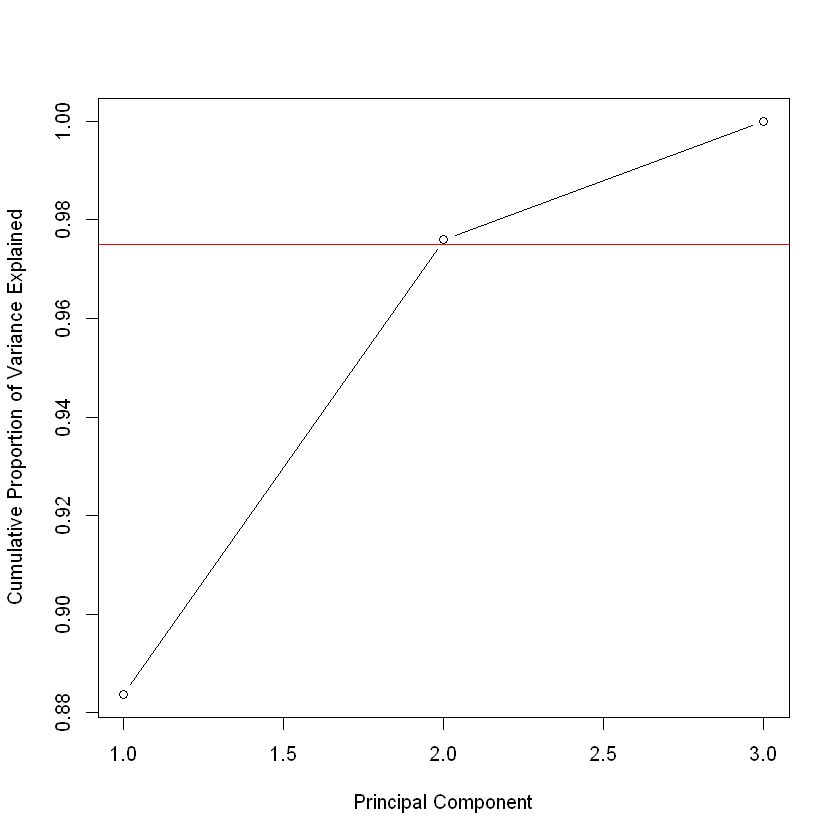

In [47]:
#names(newPrecentScaled)
prComptestg= prcomp(test[,2:4],scale=TRUE,center=TRUE) 
prComp= prcomp(train[,2:4],scale=TRUE,center=TRUE) 

prComptestoIL= prcomp(test[,5:8],scale=TRUE,center=TRUE) 

prCompOIL= prcomp(train[,5:8],scale=TRUE,center=TRUE) 

prComptestTL= prcomp(test[,11:12],scale=TRUE,center=TRUE) 

prCompTL= prcomp(train[,11:12],scale=TRUE,center=TRUE)


prComp$sdev^2
cumsum(prComp$sdev^2/sum(prComp$sdev^2))
expl.var <- round(prComp$sdev^2/sum(prComp$sdev^2)*100) # percent explained variance
expl.var
std_dev <- prComp$sdev
pr_var <- std_dev^2
prop_varex <- pr_var/sum(pr_var)
sum(prop_varex[1:5])
#pred <- predict(pca, newdata=newPrecentScaled[,1:4])

#plot(pred)

#pca$stdev^2
plot(cumsum(prop_varex), xlab = "Principal Component",ylab = "Cumulative Proportion of Variance Explained",type = "b")
abline(h=0.975,col='red',v=30)


In [50]:
test.data<-data.frame(classe = test, prComptestg$x)
train.data<-data.frame(classe = train, prComp$x)

test.data<-data.frame(test.data, prComptestoIL$x)
train.data<-data.frame(train.data, prCompOIL$x)

test.data<-data.frame(test.data, prComptestTL$x)
train.data<-data.frame(train.data, prCompTL$x)

#prComp
#prCompOIL
#prCompTL


names(train.data)


[1] "classe.spyVolume"    "classe.goldOpen"     "classe.goldLow"     
 [4] "classe.goldClose"    "classe.oilOpen"      "classe.oilClose"    
 [7] "classe.oilAdj.Close" "classe.oilVolume"    "classe.japanClose"  
[10] "classe.lqdAdj.Close" "classe.tltOpen"      "classe.tltClose"    
[13] "classe.change"       "PC1"                 "PC2"                
[16] "PC3"                 "PC1.1"               "PC2.1"              
[19] "PC3.1"               "PC4"                 "PC1.2"              
[22] "PC2.2"

In [56]:
pcaTrain <- train.data[,c(1, 9,10,13, 18,22)]
pcaTest <- test.data[,c(1, 9,10,13, 18,22)]
names(pcaTrain)

[1] "classe.spyVolume"    "classe.japanClose"   "classe.lqdAdj.Close"
[4] "classe.change"       "PC2.1"               "PC2.2"

In [57]:
library(caret)

pcaTest$classe.change<-as.factor(pcaTest$classe.change)
pcaTrain$classe.change<-as.factor(pcaTrain$classe.change)

mytrain=trainControl(method="repeatedcv",number=10, repeats=10)
set.seed(7)
model_logistic= train(classe.change~., data=pcaTrain,
                      method="glm",
                      preProcess = c("center", "scale"),
                      trControl=mytrain) 

set.seed(7)
model_knn= train(classe.change~., data=pcaTrain,
                 method="knn",
                 preProcess = c("scale", "center"),
                 trControl=mytrain,
                 tuneLength = 13)

In [58]:
predict_gbm  = predict ( model_logistic, pcaTest)
names(pcaTest)
confusionMatrix(predict_gbm, pcaTest$classe.change )


predict_gbb  = predict ( model_knn, pcaTest)
confusionMatrix(predict_gbb, pcaTest$classe.change )

[1] "classe.spyVolume"    "classe.japanClose"   "classe.lqdAdj.Close"
[4] "classe.change"       "PC2.1"               "PC2.2"

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  79  54
         1  79 148
                                          
               Accuracy : 0.6306          
                 95% CI : (0.5784, 0.6805)
    No Information Rate : 0.5611          
    P-Value [Acc > NIR] : 0.004418        
                                          
                  Kappa : 0.2368          
                                          
 Mcnemar's Test P-Value : 0.037428        
                                          
            Sensitivity : 0.5000          
            Specificity : 0.7327          
         Pos Pred Value : 0.5940          
         Neg Pred Value : 0.6520          
             Prevalence : 0.4389          
         Detection Rate : 0.2194          
   Detection Prevalence : 0.3694          
      Balanced Accuracy : 0.6163          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  80  50
         1  78 152
                                          
               Accuracy : 0.6444          
                 95% CI : (0.5926, 0.6939)
    No Information Rate : 0.5611          
    P-Value [Acc > NIR] : 0.0007909       
                                          
                  Kappa : 0.2639          
                                          
 Mcnemar's Test P-Value : 0.0170103       
                                          
            Sensitivity : 0.5063          
            Specificity : 0.7525          
         Pos Pred Value : 0.6154          
         Neg Pred Value : 0.6609          
             Prevalence : 0.4389          
         Detection Rate : 0.2222          
   Detection Prevalence : 0.3611          
      Balanced Accuracy : 0.6294          
                                          
       'Positive' Class : 0               
                              

In [89]:


class(newPrecentScaled$change) 

newPrecentScaled$change = as.factor(newPrecentScaled$change)


set.seed(123456)

rows= sample(1:nrow(newPrecentScaled),size = 0.7*nrow(newPrecentScaled), replace=FALSE) 

train = newPrecentScaled[rows,]
test = newPrecentScaled[-rows,]
names(train)
train<-train[,c(6, 16, 18, 22, 35, 37, 40, 41, 49)]
test<-test[,c(6, 16, 18, 22, 35, 37, 40, 41, 49)]

names(train)

[1] "factor"

[1] "spyOpen"          "spyHigh"          "spyLow"           "spyClose"        
 [5] "spyAdj.Close"     "spyVolume"        "goldOpen"         "goldHigh"        
 [9] "goldLow"          "goldClose"        "goldAdj.Close"    "goldVolume"      
[13] "oilOpen"          "oilHigh"          "oilLow"           "oilClose"        
[17] "oilAdj.Close"     "oilVolume"        "japanOpen"        "japanHigh"       
[21] "japanLow"         "japanClose"       "japanAdj.Close"   "japanVolume"     
[25] "btcOpen"          "btcHigh"          "btcLow"           "btcClose"        
[29] "btcAdj.Close"     "btcVolume"        "lqdOpen"          "lqdHigh"         
[33] "lqdLow"           "lqdClose"         "lqdAdj.Close"     "lqdVolume"       
[37] "tltOpen"          "tltHigh"          "tltLow"           "tltClose"        
[41] "tltAdj.Close"     "tltVolume"        "euroUSDOpen"      "euroUSDHigh"     
[45] "euroUSDLow"       "euroUSDClose"     "euroUSDAdj.Close" "euroUSDVolume"   
[49] "change"

[1] "spyVolume"    "oilClose"     "oilVolume"    "japanClose"   "lqdAdj.Close"
[6] "tltOpen"      "tltClose"     "tltAdj.Close" "change"


Classification tree:
tree(formula = change ~ ., data = train)
Variables actually used in tree construction:
[1] "tltAdj.Close" "spyVolume"    "japanClose"   "lqdAdj.Close" "oilClose"    
Number of terminal nodes:  8 
Residual mean deviance:  1.158 = 963.4 / 832 
Misclassification error rate: 0.3012 = 253 / 840 

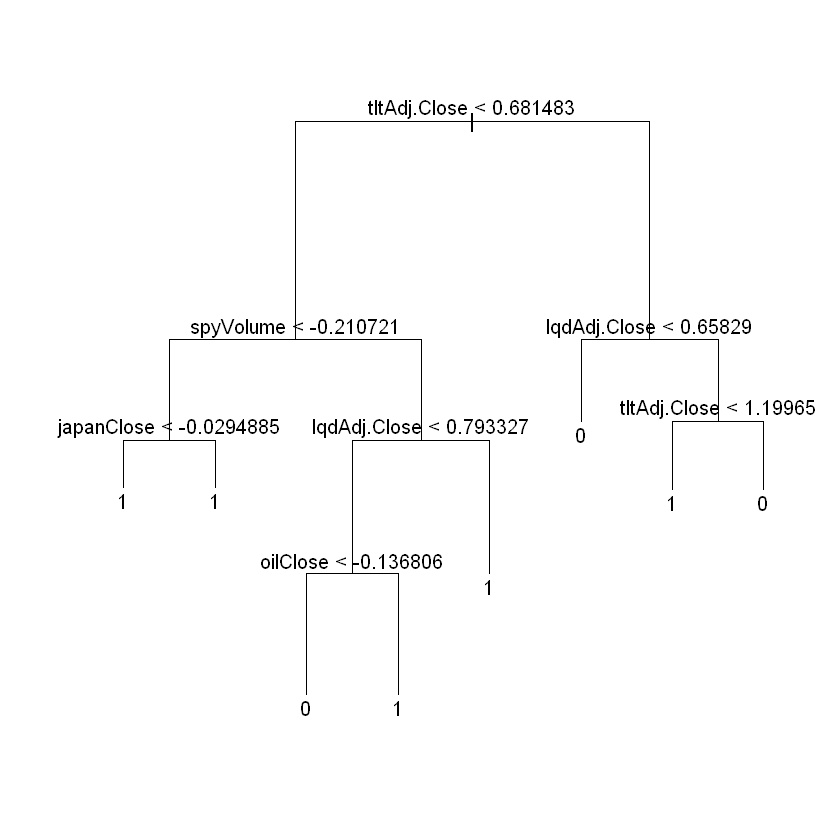

In [90]:
#Create Tree Model
library(tree)
tree.stocks= tree(change~., data=train)

#Get Summary info

summary(tree.stocks)
plot(tree.stocks)
text(tree.stocks, pretty=0)

In [105]:
###"Logistic with sound economic princples"
class(newPrecentScaled$change) 

newPrecentScaled$change = as.factor(newPrecentScaled$change)


set.seed(123456)

rows= sample(1:nrow(newPrecentScaled),size = 0.7*nrow(newPrecentScaled), replace=FALSE) 

train = newPrecentScaled[rows,]
test = newPrecentScaled[-rows,]
names(train)
train<-train[,c(6,  10,16, 22, 28, 34, 40, 46, 49)]
test<-test[,c(6,  10,16, 22, 28, 34, 40, 46, 49)]

names(train)


mytrain=trainControl(method="repeatedcv",number=10, repeats=10)
set.seed(7)
model_logistic= train(change~., data=train,
                      method="glm",
                      preProcess = c("center", "scale"),
                      trControl=mytrain) 


predict_gbm  = predict ( model_logistic, test) 

confusionMatrix(predict_gbm, test$change )

[1] "factor"

[1] "spyOpen"          "spyHigh"          "spyLow"           "spyClose"        
 [5] "spyAdj.Close"     "spyVolume"        "goldOpen"         "goldHigh"        
 [9] "goldLow"          "goldClose"        "goldAdj.Close"    "goldVolume"      
[13] "oilOpen"          "oilHigh"          "oilLow"           "oilClose"        
[17] "oilAdj.Close"     "oilVolume"        "japanOpen"        "japanHigh"       
[21] "japanLow"         "japanClose"       "japanAdj.Close"   "japanVolume"     
[25] "btcOpen"          "btcHigh"          "btcLow"           "btcClose"        
[29] "btcAdj.Close"     "btcVolume"        "lqdOpen"          "lqdHigh"         
[33] "lqdLow"           "lqdClose"         "lqdAdj.Close"     "lqdVolume"       
[37] "tltOpen"          "tltHigh"          "tltLow"           "tltClose"        
[41] "tltAdj.Close"     "tltVolume"        "euroUSDOpen"      "euroUSDHigh"     
[45] "euroUSDLow"       "euroUSDClose"     "euroUSDAdj.Close" "euroUSDVolume"   
[49] "change"

[1] "spyVolume"    "goldClose"    "oilClose"     "japanClose"   "btcClose"    
[6] "lqdClose"     "tltClose"     "euroUSDClose" "change"

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  99  53
         1  59 149
                                          
               Accuracy : 0.6889          
                 95% CI : (0.6383, 0.7364)
    No Information Rate : 0.5611          
    P-Value [Acc > NIR] : 4.565e-07       
                                          
                  Kappa : 0.3657          
                                          
 Mcnemar's Test P-Value : 0.6366          
                                          
            Sensitivity : 0.6266          
            Specificity : 0.7376          
         Pos Pred Value : 0.6513          
         Neg Pred Value : 0.7163          
             Prevalence : 0.4389          
         Detection Rate : 0.2750          
   Detection Prevalence : 0.4222          
      Balanced Accuracy : 0.6821          
                                          
       'Positive' Class : 0               
                              

In [108]:
###"Logistic with sound economic princples and eliminating the high P values"

class(newPrecentScaled$change) 

newPrecentScaled$change = as.factor(newPrecentScaled$change)


set.seed(123456)

rows= sample(1:nrow(newPrecentScaled),size = 0.7*nrow(newPrecentScaled), replace=FALSE) 

train = newPrecentScaled[rows,]
test = newPrecentScaled[-rows,]
names(train)
train<-train[,c(6, 16, 22, 28, 40, 46, 49)]
test<-test[,c(6, 16, 22, 28, 40, 46, 49)]

names(train)


mytrain=trainControl(method="repeatedcv",number=10, repeats=10)
set.seed(7)
model_logistic= train(change~., data=train,
                      method="glm",
                      preProcess = c("center", "scale"),
                      trControl=mytrain) 


predict_gbm  = predict ( model_logistic, test) 

confusionMatrix(predict_gbm, test$change )

[1] "factor"

[1] "spyOpen"          "spyHigh"          "spyLow"           "spyClose"        
 [5] "spyAdj.Close"     "spyVolume"        "goldOpen"         "goldHigh"        
 [9] "goldLow"          "goldClose"        "goldAdj.Close"    "goldVolume"      
[13] "oilOpen"          "oilHigh"          "oilLow"           "oilClose"        
[17] "oilAdj.Close"     "oilVolume"        "japanOpen"        "japanHigh"       
[21] "japanLow"         "japanClose"       "japanAdj.Close"   "japanVolume"     
[25] "btcOpen"          "btcHigh"          "btcLow"           "btcClose"        
[29] "btcAdj.Close"     "btcVolume"        "lqdOpen"          "lqdHigh"         
[33] "lqdLow"           "lqdClose"         "lqdAdj.Close"     "lqdVolume"       
[37] "tltOpen"          "tltHigh"          "tltLow"           "tltClose"        
[41] "tltAdj.Close"     "tltVolume"        "euroUSDOpen"      "euroUSDHigh"     
[45] "euroUSDLow"       "euroUSDClose"     "euroUSDAdj.Close" "euroUSDVolume"   
[49] "change"

[1] "spyVolume"    "oilClose"     "japanClose"   "btcClose"     "tltClose"    
[6] "euroUSDClose" "change"

In [24]:
###"Logistic with sound economic princples and eliminating the high P values"

class(newPrecentScaled$change) 

newPrecentScaled$change = as.factor(newPrecentScaled$change)


set.seed(123456)

rows= sample(1:nrow(newPrecentScaled),size = 0.7*nrow(newPrecentScaled), replace=FALSE) 

train = newPrecentScaled[rows,]
test = newPrecentScaled[-rows,]
names(train)
train<-train[,c(6, 16, 18, 22, 35, 40, 49)]
test<-test[,c(6, 16, 18, 22, 35, 40, 49)]

names(train)


mytrain=trainControl(method="repeatedcv",number=10, repeats=10)
set.seed(7)
model_logistic= train(change~., data=train,
                      method="glm",
                      preProcess = c("center", "scale"),
                      trControl=mytrain) 


predict_gbm  = predict ( model_logistic, test) 

confusionMatrix(predict_gbm, test$change )

[1] "factor"

[1] "spyOpen"          "spyHigh"          "spyLow"           "spyClose"        
 [5] "spyAdj.Close"     "spyVolume"        "goldOpen"         "goldHigh"        
 [9] "goldLow"          "goldClose"        "goldAdj.Close"    "goldVolume"      
[13] "oilOpen"          "oilHigh"          "oilLow"           "oilClose"        
[17] "oilAdj.Close"     "oilVolume"        "japanOpen"        "japanHigh"       
[21] "japanLow"         "japanClose"       "japanAdj.Close"   "japanVolume"     
[25] "btcOpen"          "btcHigh"          "btcLow"           "btcClose"        
[29] "btcAdj.Close"     "btcVolume"        "lqdOpen"          "lqdHigh"         
[33] "lqdLow"           "lqdClose"         "lqdAdj.Close"     "lqdVolume"       
[37] "tltOpen"          "tltHigh"          "tltLow"           "tltClose"        
[41] "tltAdj.Close"     "tltVolume"        "euroUSDOpen"      "euroUSDHigh"     
[45] "euroUSDLow"       "euroUSDClose"     "euroUSDAdj.Close" "euroUSDVolume"   
[49] "change"

[1] "spyVolume"    "oilClose"     "oilVolume"    "japanClose"   "lqdAdj.Close"
[6] "tltClose"     "change"

Generalized Linear Model 

840 samples
  6 predictor
  2 classes: '0', '1' 

Pre-processing: centered (6), scaled (6) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 756, 756, 755, 756, 756, 756, ... 
Resampling results:

  Accuracy   Kappa    
  0.7338543  0.4620972


ERROR: Error in plot.train(model_logistic): There are no tuning parameters for this model.


In [7]:
names(train)

[1] "spyVolume"    "oilClose"     "oilVolume"    "japanClose"   "lqdAdj.Close"
[6] "tltClose"     "change"

In [12]:
   levels(train$change)=c("Up","Down")

myControl <- trainControl(
                           method = "cv", number = 10,
                           summaryFunction = twoClassSummary,
                           classProbs = TRUE # Super important!
                          )

myGrid <- expand.grid(
                       alpha = 0:1,
                       lambda = seq(0.0001, 1, length = 7)
                      )

# Fit the model
set.seed(seed)
model <- train(train$change~., data = train, method = "glmnet",
               tuneGrid = myGrid, trControl = myControl)

# Check the model
model
max((model$results)$ROC)


Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

ERROR: Error in `[.data.frame`(data, , all.vars(Terms), drop = FALSE): undefined columns selected


In [21]:

set.seed(seed)
model_lasso <- train(change~., data=train, method = "glmnet", 
                             trControl = myControl, 
                             nlambda = 25,
                             metric="Accuracy",
                             #metric = "ROC",
                             tuneGrid = expand.grid(alpha = 0,
                                                   lambda = seq(0.001,0.1,by = 0.001)))

model_lasso

#########

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

glmnet 

840 samples
  6 predictor
  2 classes: 'Up', 'Down' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 756, 756, 756, 756, 755, 756, ... 
Resampling results across tuning parameters:

  lambda  ROC        Sens       Spec     
  0.001   0.8014109  0.6428475  0.8049275
  0.002   0.8014109  0.6428475  0.8049275
  0.003   0.8014109  0.6428475  0.8049275
  0.004   0.8014109  0.6428475  0.8049275
  0.005   0.8014109  0.6428475  0.8049275
  0.006   0.8014109  0.6428475  0.8049275
  0.007   0.8014109  0.6428475  0.8049275
  0.008   0.8014109  0.6428475  0.8049275
  0.009   0.8014109  0.6428475  0.8049275
  0.010   0.8014109  0.6428475  0.8049275
  0.011   0.8014109  0.6428475  0.8049275
  0.012   0.8014109  0.6428475  0.8049275
  0.013   0.8008981  0.6428475  0.8049275
  0.014   0.8002633  0.6428475  0.8049275
  0.015   0.7996317  0.6402834  0.8049275
  0.016   0.7991144  0.6325236  0.8049275
  0.017   0.7984271  0.6247638  0.8049275
  0.018   0.797688

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


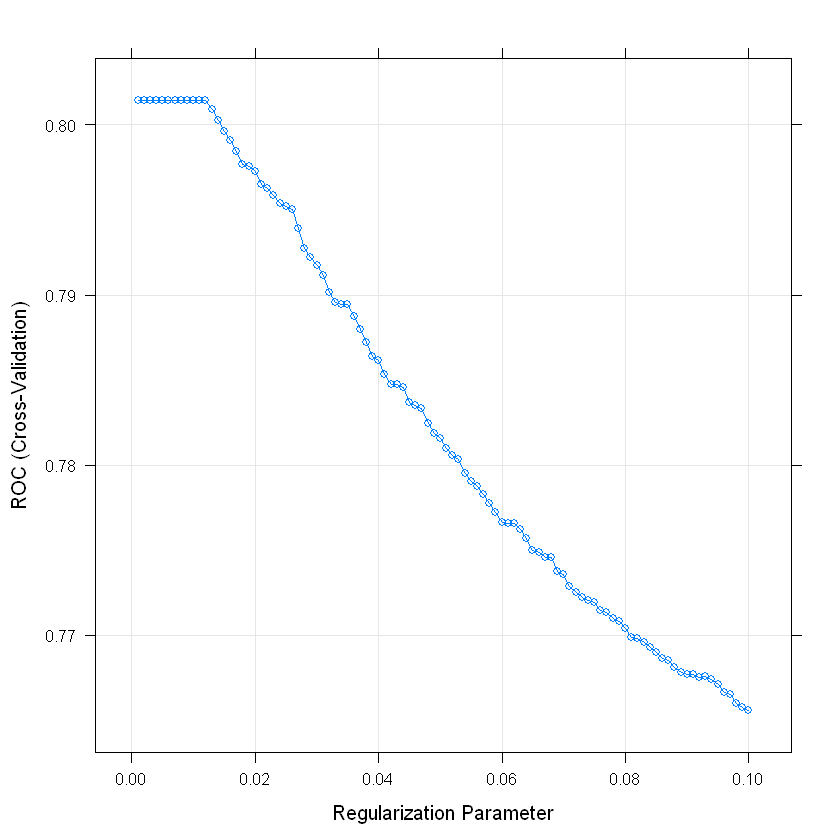

In [25]:
plot(model_lasso)
abline(h=0.975,col='red')

In [26]:
set.seed(seed)
model_stepLDA <- train(change~.,
                       data=train,
                       method="stepLDA",
                        #tuneGrid= model_stepLDA$bestTune,
                        preProc=c("center", "scale"),
                       trControl=mytrain)
names(model_stepLDA)

 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59781;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69053;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        2.14 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.602;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.697;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59746;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70075;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60593;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69961;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61242;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69709;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.48 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61126;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69056;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61225;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69035;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.5 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61368;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.7103;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.55 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.6024;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69875;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.5 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60839;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68916;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.5 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60316;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69711;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.52 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60712;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69698;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60832;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68128;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60104;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69677;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.49 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60239;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69105;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60179;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69833;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60175;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69442;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.48 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60321;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70505;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61111;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69719;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61509;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70486;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59939;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68637;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.5 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60463;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69044;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.53 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61237;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69168;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.48 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.5984;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69868;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61121;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70123;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60595;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.71016;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61075;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69942;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.61 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59802;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.6894;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61649;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69702;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.48 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60179;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70111;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.5 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60449;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.7023;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.52 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61342;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69937;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60975;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68921;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.49 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60589;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69849;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.49 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60307;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69565;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.42 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60449;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68784;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.48 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61104;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69175;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.49 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59921;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69989;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60646;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69619;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.5 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60175;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69702;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60584;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69839;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.6216;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69712;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61111;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68921;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60042;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70251;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.48 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60093;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70277;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.43 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60593;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70239;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.42 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60267;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70088;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60158;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69296;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60989;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69168;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61774;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69714;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.43 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60595;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70654;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.6164;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70511;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60465;  in: "oilClose";  variables (1): oilClose 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.33 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61354;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68807;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61372;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69163;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60986;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68653;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.5 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59561;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69602;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.6027;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69525;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59784;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.6983;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.5 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60196;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69179;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60181;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69702;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.43 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60051;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69181;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.49 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60614;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69744;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60321;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70902;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60979;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70105;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.5 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61098;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69574;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60568;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68904;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59802;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69581;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.49 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60981;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69307;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
        0.0         0.0         0.6 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60386;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70318;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.42 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60711;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69702;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60321;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70375;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.42 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61253;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69861;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60309;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69844;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61332;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70342;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.42 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60489;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68549;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.6163;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69053;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.43 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59254;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69989;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60826;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70249;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60447;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70089;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.48 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.5966;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70088;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.6204;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69447;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.48 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60328;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69968;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59398;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69319;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60316;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70493;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.42 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60535;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68989;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60858;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69453;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60851;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69719;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60965;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70223;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60761;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70814;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60188;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70377;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
757 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60519;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69079;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61386;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70225;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60967;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70921;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59798;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69846;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.42 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
755 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.59861;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.70486;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.61107;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69428;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60602;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68921;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.46 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60312;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69961;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.45 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
756 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.6046;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.68263;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.47 



 `stepwise classification', using 10-fold cross-validated correctness rate of method lda'.
840 observations of 6 variables in 2 classes; direction: both
stop criterion: improvement less than 5%.


correctness rate: 0.60357;  in: "tltClose";  variables (1): tltClose 
correctness rate: 0.69167;  in: "lqdAdj.Close";  variables (2): tltClose, lqdAdj.Close 

 hr.elapsed min.elapsed sec.elapsed 
       0.00        0.00        0.44 



[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "resample"     "resampledCM" 
[16] "perfNames"    "maximize"     "yLimits"      "times"        "levels"      
[21] "terms"        "coefnames"    "xlevels"

In [34]:
model_stepLDA$finalModel
model_stepLDA$results

method      : lda 
final model : y ~ lqdAdj.Close + tltClose
<environment: 0x000000000ad594d8>

correctness rate = 0.6917 

maxvar,direction,Accuracy,Kappa,AccuracySD,KappaSD
Inf,both,0.6931273,0.377893,0.05124436,0.1049652


treebag variable importance

             Overall
tltClose      100.00
spyVolume      87.00
japanClose     63.52
oilClose       58.55
lqdAdj.Close   44.06
oilVolume       0.00

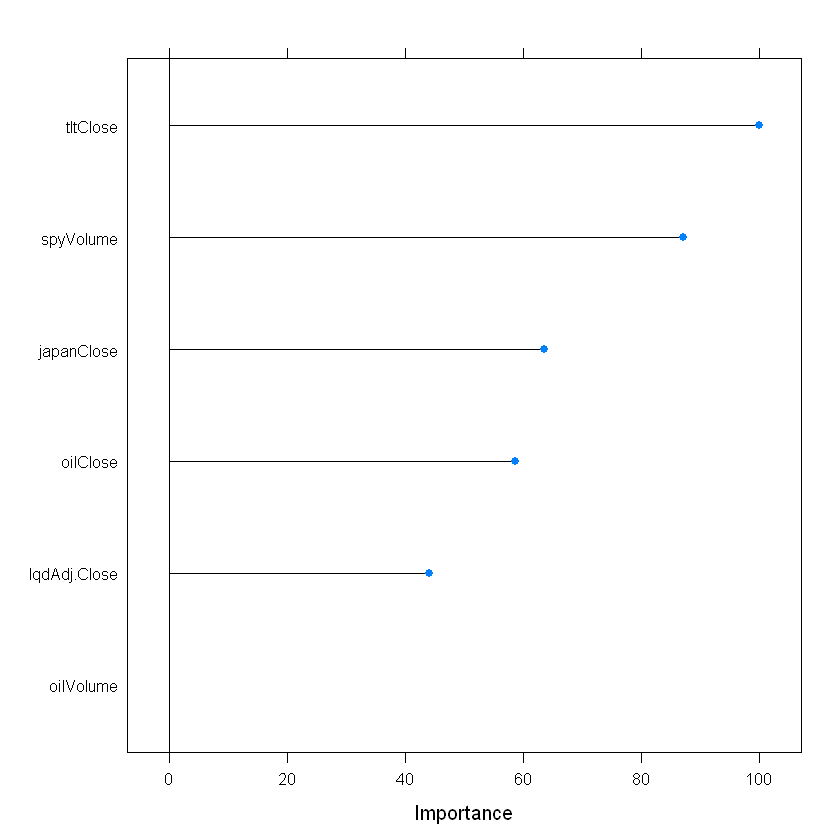

In [39]:
set.seed(seed)
model_treebag <- train(change~., data=train, method="treebag", trControl=mytrain)

varImp(model_treebag )
plot(varImp(model_treebag ))

In [38]:
names(model_treebag )
show(model_treebag)

[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "resample"     "resampledCM" 
[16] "perfNames"    "maximize"     "yLimits"      "times"        "levels"      
[21] "terms"        "coefnames"    "xlevels"

Bagged CART 

840 samples
  6 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 756, 756, 755, 756, 756, 756, ... 
Resampling results:

  Accuracy  Kappa    
  0.679916  0.3519964



Warning message:
"model fit failed for Fold01.Rep01: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep01: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep01: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep01: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep01: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep01: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep01: C=0.0

"Warning message:
"model fit failed for Fold04.Rep06: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep06: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep06: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep06: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep06: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep06: C=0.0000 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep06: C=0.

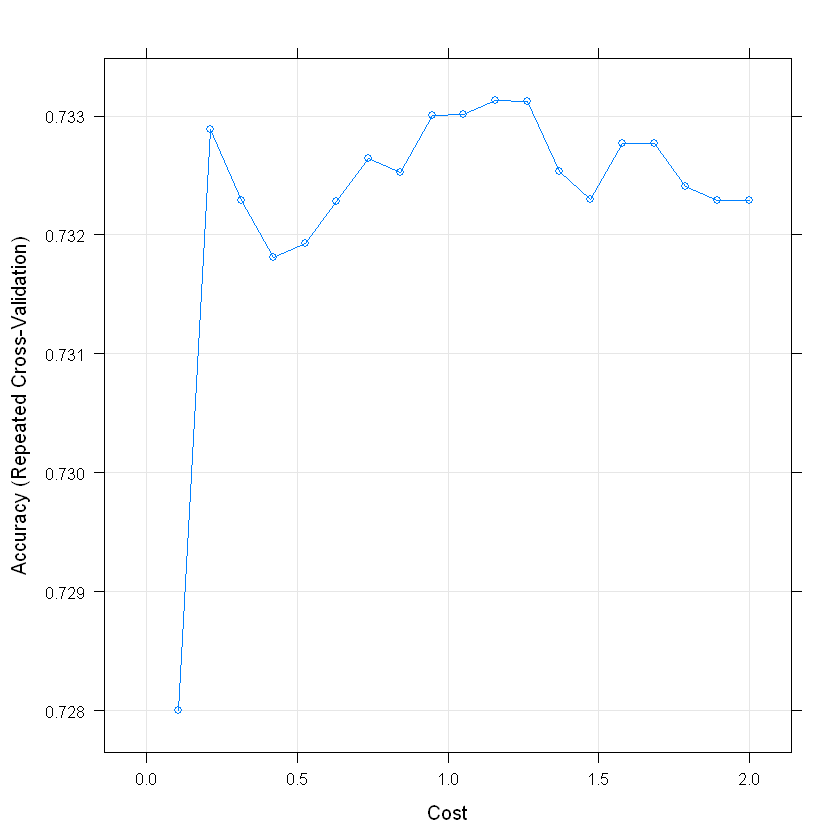

In [41]:

set.seed(seed)
model_svmLinear <- train(change~., data=train,
                         method="svmLinear",
                         trControl=mytrain,
                        tuneGrid = expand.grid(C = seq(0, 2, length = 20)),
  preProcess = c("center","scale"))


,C
12,1.157895


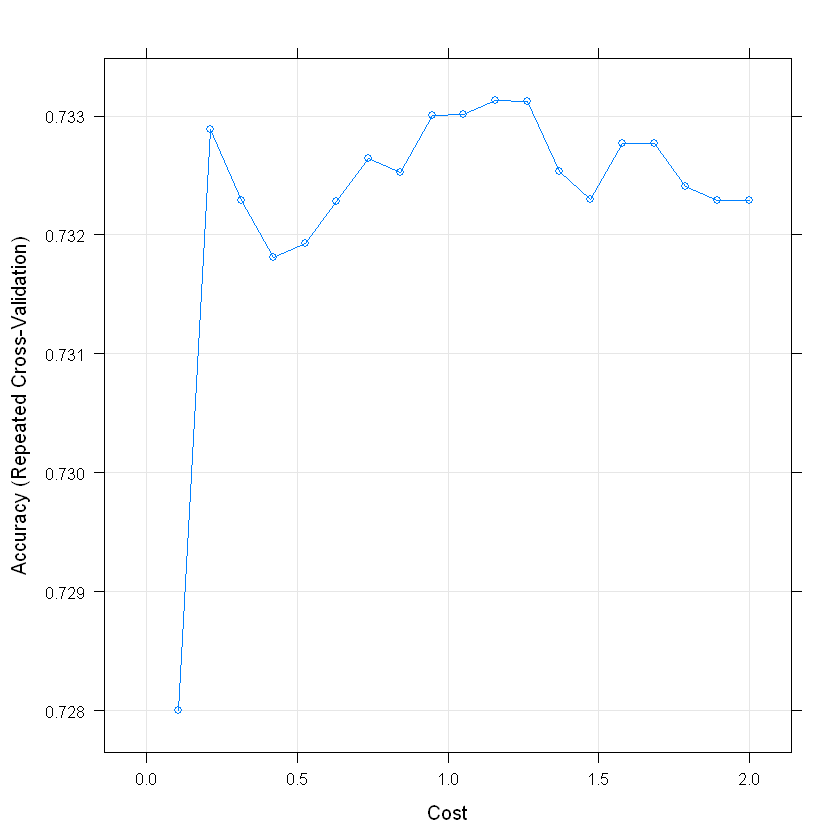

In [44]:
plot(model_svmLinear)
model_svmLinear$bestTune

In [45]:
svmGrid <- expand.grid(sigma= 2^c(-25, -20, -15,-10, -5, 0), C= 2^c(0:5))
tune.grid.svmRdialWeights<- expand.grid ( C = c( 1 ,3 ,5 ,10 ,20) ,
            Weight = c(0.1 ,0.5 ,1 ,2 ,3 ,5 ,10) ,
            sigma = c(0.0005 ,0.001 ,0.005 ,0.01 ,0.05) )

model_svm= train(change~., data=train,
                 method="svmRadialWeights",
                 trControl=mytrain,
                 preProcess = c("center", "scale"),
                 tuneLength = 10,
                 #tuneGrid=grid
                 tuneGrid=tune.grid.svmRdialWeights
                ) 


In [ ]:
set.seed(1)
rf_random <- train(change~ .,
                   data = train,
                    method="rf", trControl=mytrain,
                   tuneLength  = 6, 
                   trControl = control)
print(rf_random)